# Computer Vision - Face Recognition
In this hands-on project, the goal is to build a face identification model to recognize faces.

Data Description - Aligned Face Dataset from Pinterest

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

### Objective

In this problem, we use a pre-trained model trained on Face Recognition to recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not.

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import matplotlib.pyplot as plt
import tensorflow
tensorflow.__version__

'2.0.1'

#### Change current working directory to project folder (1 mark)

In [2]:
import os
os.chdir('AIML/')
print('Working directory changed!')

#verifying the current working directory
cwd = os.getcwd()
print('\nCurrent working directory: ', cwd)

Working directory changed!

Current working directory:  /home/ec2-user/SageMaker/AIML


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [3]:
train_images = 'Aligned Face Dataset from Pinterest.zip'

In [4]:
import zipfile
archive = zipfile.ZipFile(train_images, 'r')
archive.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [5]:
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [6]:
import cv2

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

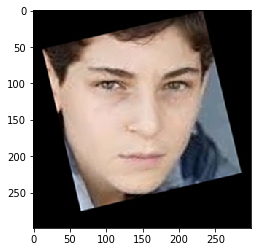

In [7]:
img_1 = load_image(metadata[10].image_path())
plt.imshow(img_1)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1, 1),  input_shape = (224, 224, 3)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Convolution2D(4096, (7, 7), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [9]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs = model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [11]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224, 224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [12]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i in range(len(metadata)):
    img_path = metadata[i].image_path()
    print(i, metadata[i])
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224, 224))
    
    #obtaining embedding vectors of all images
    embedding_vectors = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
    embeddings[i] = embedding_vectors

0 PINS/pins_david mazouz/david mazouz15.jpg
1 PINS/pins_david mazouz/david mazouz57.jpg
2 PINS/pins_david mazouz/david mazouz52.jpg
3 PINS/pins_david mazouz/david mazouz38.jpg
4 PINS/pins_david mazouz/david mazouz39.jpg
5 PINS/pins_david mazouz/david mazouz100.jpg
6 PINS/pins_david mazouz/david mazouz48.jpg
7 PINS/pins_david mazouz/david mazouz23.jpg
8 PINS/pins_david mazouz/david mazouz63.jpg
9 PINS/pins_david mazouz/david mazouz40.jpg
10 PINS/pins_david mazouz/david mazouz62.jpg
11 PINS/pins_david mazouz/david mazouz13.jpg
12 PINS/pins_david mazouz/david mazouz18.jpg
13 PINS/pins_david mazouz/david mazouz37.jpg
14 PINS/pins_david mazouz/david mazouz78.jpg
15 PINS/pins_david mazouz/david mazouz28.jpg
16 PINS/pins_david mazouz/david mazouz72.jpg
17 PINS/pins_david mazouz/david mazouz53.jpg
18 PINS/pins_david mazouz/david mazouz44.jpg
19 PINS/pins_david mazouz/david mazouz34.jpg
20 PINS/pins_david mazouz/david mazouz29.jpg
21 PINS/pins_david mazouz/david mazouz43.jpg
22 PINS/pins_david 

160 PINS/pins_chadwick boseman face/chadwick boseman face112.jpg
161 PINS/pins_chadwick boseman face/chadwick boseman face71.jpg
162 PINS/pins_chadwick boseman face/chadwick boseman face19.jpg
163 PINS/pins_chadwick boseman face/chadwick boseman face117.jpg
164 PINS/pins_chadwick boseman face/chadwick boseman face61.jpg
165 PINS/pins_chadwick boseman face/chadwick boseman face77.jpg
166 PINS/pins_chadwick boseman face/chadwick boseman face66.jpg
167 PINS/pins_chadwick boseman face/chadwick boseman face8.jpg
168 PINS/pins_chadwick boseman face/chadwick boseman face68.jpg
169 PINS/pins_chadwick boseman face/chadwick boseman face63.jpg
170 PINS/pins_chadwick boseman face/chadwick boseman face50.jpg
171 PINS/pins_chadwick boseman face/chadwick boseman face10.jpg
172 PINS/pins_chadwick boseman face/chadwick boseman face70.jpg
173 PINS/pins_chadwick boseman face/chadwick boseman face43.jpg
174 PINS/pins_chadwick boseman face/chadwick boseman face93.jpg
175 PINS/pins_chadwick boseman face/cha

303 PINS/pins_Kumail Nanjiani/Kumail Nanjiani22.jpg
304 PINS/pins_Kumail Nanjiani/Kumail Nanjiani86.jpg
305 PINS/pins_Kumail Nanjiani/Kumail Nanjiani35.jpg
306 PINS/pins_Kumail Nanjiani/Kumail Nanjiani87.jpg
307 PINS/pins_Kumail Nanjiani/Kumail Nanjiani57.jpg
308 PINS/pins_Kumail Nanjiani/Kumail Nanjiani76.jpg
309 PINS/pins_Kumail Nanjiani/Kumail Nanjiani68.jpg
310 PINS/pins_Kumail Nanjiani/Kumail Nanjiani54.jpg
311 PINS/pins_Kumail Nanjiani/Kumail Nanjiani7.jpg
312 PINS/pins_Kumail Nanjiani/Kumail Nanjiani39.jpg
313 PINS/pins_jason isaacs/jason isaacs125_2038.jpg
314 PINS/pins_jason isaacs/jason isaacs162_2058.jpg
315 PINS/pins_jason isaacs/jason isaacs130_2068.jpg
316 PINS/pins_jason isaacs/jason isaacs86_2059.jpg
317 PINS/pins_jason isaacs/jason isaacs23_2010.jpg
318 PINS/pins_jason isaacs/jason isaacs119_2118.jpg
319 PINS/pins_jason isaacs/jason isaacs41_2080.jpg
320 PINS/pins_jason isaacs/jason isaacs25_2054.jpg
321 PINS/pins_jason isaacs/jason isaacs182_2122.jpg
322 PINS/pins_jas

463 PINS/pins_Jon Bernthal/Jon Bernthal48_2191.jpg
464 PINS/pins_Jon Bernthal/Jon Bernthal76_2153.jpg
465 PINS/pins_Jon Bernthal/Jon Bernthal50_2179.jpg
466 PINS/pins_Jon Bernthal/Jon Bernthal64_2151.jpg
467 PINS/pins_Jon Bernthal/Jon Bernthal0_2150.jpg
468 PINS/pins_Jon Bernthal/Jon Bernthal65_2134.jpg
469 PINS/pins_Jon Bernthal/Jon Bernthal167_2160.jpg
470 PINS/pins_Jon Bernthal/Jon Bernthal199_2193.jpg
471 PINS/pins_Jon Bernthal/Jon Bernthal152_2137.jpg
472 PINS/pins_Jon Bernthal/Jon Bernthal67_2189.jpg
473 PINS/pins_Jon Bernthal/Jon Bernthal146_2170.jpg
474 PINS/pins_Jon Bernthal/Jon Bernthal138_2145.jpg
475 PINS/pins_Jon Bernthal/Jon Bernthal56_2142.jpg
476 PINS/pins_Jon Bernthal/Jon Bernthal63_2155.jpg
477 PINS/pins_Jon Bernthal/Jon Bernthal62_2192.jpg
478 PINS/pins_Jon Bernthal/Jon Bernthal149_2190.jpg
479 PINS/pins_Jon Bernthal/Jon Bernthal28_2135.jpg
480 PINS/pins_Jon Bernthal/Jon Bernthal10_2138.jpg
481 PINS/pins_Jon Bernthal/Jon Bernthal4_2174.jpg
482 PINS/pins_Jon Bernthal/

645 PINS/pins_shakira/shakira34.jpg
646 PINS/pins_shakira/shakira21.jpg
647 PINS/pins_shakira/shakira38.jpg
648 PINS/pins_shakira/shakira16.jpg
649 PINS/pins_shakira/shakira46.jpg
650 PINS/pins_shakira/shakira36.jpg
651 PINS/pins_shakira/shakira11.jpg
652 PINS/pins_shakira/shakira3.jpg
653 PINS/pins_shakira/shakira22.jpg
654 PINS/pins_shakira/shakira25.jpg
655 PINS/pins_shakira/shakira10.jpg
656 PINS/pins_shakira/shakira18.jpg
657 PINS/pins_shakira/shakira19.jpg
658 PINS/pins_shakira/shakira33.jpg
659 PINS/pins_shakira/shakira35.jpg
660 PINS/pins_shakira/shakira31.jpg
661 PINS/pins_shakira/shakira40.jpg
662 PINS/pins_shakira/shakira23.jpg
663 PINS/pins_shakira/shakira45.jpg
664 PINS/pins_shakira/shakira4.jpg
665 PINS/pins_shakira/shakira1.jpg
666 PINS/pins_shakira/shakira29.jpg
667 PINS/pins_shakira/shakira7.jpg
668 PINS/pins_shakira/shakira32.jpg
669 PINS/pins_shakira/shakira30.jpg
670 PINS/pins_shakira/shakira43.jpg
671 PINS/pins_shakira/shakira15.jpg
672 PINS/pins_shakira/shakira20.

819 PINS/pins_Kit Harington/Kit Harington29_1778.jpg
820 PINS/pins_Kit Harington/Kit Harington93_1836.jpg
821 PINS/pins_Kit Harington/Kit Harington59_1771.jpg
822 PINS/pins_Kit Harington/Kit Harington197_1761.jpg
823 PINS/pins_Kit Harington/Kit Harington6_1849.jpg
824 PINS/pins_Kit Harington/Kit Harington70_1844.jpg
825 PINS/pins_Kit Harington/Kit Harington77_1821.jpg
826 PINS/pins_Kit Harington/Kit Harington63_1804.jpg
827 PINS/pins_Kit Harington/Kit Harington126_1785.jpg
828 PINS/pins_Kit Harington/Kit Harington113_1758.jpg
829 PINS/pins_Kit Harington/Kit Harington173_1756.jpg
830 PINS/pins_Kit Harington/Kit Harington164_1819.jpg
831 PINS/pins_Kit Harington/Kit Harington140_1802.jpg
832 PINS/pins_Kit Harington/Kit Harington105_1773.jpg
833 PINS/pins_Kit Harington/Kit Harington189_1814.jpg
834 PINS/pins_Kit Harington/Kit Harington95_1793.jpg
835 PINS/pins_Kit Harington/Kit Harington191_1827.jpg
836 PINS/pins_Kit Harington/Kit Harington63_1805.jpg
837 PINS/pins_Kit Harington/Kit Haring

963 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch63.jpg
964 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch53.jpg
965 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch76.jpg
966 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch34.jpg
967 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch60.jpg
968 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch41.jpg
969 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch71.jpg
970 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch18.jpg
971 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch57.jpg
972 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch68.jpg
973 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch61.jpg
974 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch19.jpg
975 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch42.jpg
976 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch6.jpg
977 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch0.jpg
978 PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch17.jpg
979 PINS/p

1128 PINS/pins_Jason Momoa/Jason Momoa74.jpg
1129 PINS/pins_Jason Momoa/Jason Momoa125.jpg
1130 PINS/pins_Jason Momoa/Jason Momoa68.jpg
1131 PINS/pins_Jason Momoa/Jason Momoa134.jpg
1132 PINS/pins_Jason Momoa/Jason Momoa106.jpg
1133 PINS/pins_Jason Momoa/Jason Momoa46.jpg
1134 PINS/pins_Jason Momoa/Jason Momoa105.jpg
1135 PINS/pins_Jason Momoa/Jason Momoa98.jpg
1136 PINS/pins_Jason Momoa/Jason Momoa33.jpg
1137 PINS/pins_Jason Momoa/Jason Momoa47.jpg
1138 PINS/pins_Jason Momoa/Jason Momoa59.jpg
1139 PINS/pins_Jason Momoa/Jason Momoa24.jpg
1140 PINS/pins_Jason Momoa/Jason Momoa90.jpg
1141 PINS/pins_Jason Momoa/Jason Momoa107.jpg
1142 PINS/pins_Jason Momoa/Jason Momoa86.jpg
1143 PINS/pins_Jason Momoa/Jason Momoa23.jpg
1144 PINS/pins_Jason Momoa/Jason Momoa27.jpg
1145 PINS/pins_Jason Momoa/Jason Momoa0.jpg
1146 PINS/pins_Jason Momoa/Jason Momoa122.jpg
1147 PINS/pins_Jason Momoa/Jason Momoa67.jpg
1148 PINS/pins_Jason Momoa/Jason Momoa42.jpg
1149 PINS/pins_Jason Momoa/Jason Momoa26.jpg
1150 

1299 PINS/pins_Dominic Purcell/Dominic Purcell11.jpg
1300 PINS/pins_Dominic Purcell/Dominic Purcell87.jpg
1301 PINS/pins_Dominic Purcell/Dominic Purcell94.jpg
1302 PINS/pins_Dominic Purcell/Dominic Purcell34.jpg
1303 PINS/pins_Dominic Purcell/Dominic Purcell7.jpg
1304 PINS/pins_Dominic Purcell/Dominic Purcell42.jpg
1305 PINS/pins_Dominic Purcell/Dominic Purcell38.jpg
1306 PINS/pins_Dominic Purcell/Dominic Purcell72.jpg
1307 PINS/pins_Dominic Purcell/Dominic Purcell60.jpg
1308 PINS/pins_Dominic Purcell/Dominic Purcell104.jpg
1309 PINS/pins_Dominic Purcell/Dominic Purcell54.jpg
1310 PINS/pins_Dominic Purcell/Dominic Purcell93.jpg
1311 PINS/pins_Dominic Purcell/Dominic Purcell41.jpg
1312 PINS/pins_Dominic Purcell/Dominic Purcell75.jpg
1313 PINS/pins_Dominic Purcell/Dominic Purcell90.jpg
1314 PINS/pins_Dominic Purcell/Dominic Purcell23.jpg
1315 PINS/pins_Dominic Purcell/Dominic Purcell26.jpg
1316 PINS/pins_Dominic Purcell/Dominic Purcell25.jpg
1317 PINS/pins_Dominic Purcell/Dominic Purcell

1439 PINS/pins_barbara palvin face/barbara palvin face65.jpg
1440 PINS/pins_barbara palvin face/barbara palvin face106.jpg
1441 PINS/pins_barbara palvin face/barbara palvin face92.jpg
1442 PINS/pins_barbara palvin face/barbara palvin face59.jpg
1443 PINS/pins_barbara palvin face/barbara palvin face66.jpg
1444 PINS/pins_barbara palvin face/barbara palvin face97.jpg
1445 PINS/pins_barbara palvin face/barbara palvin face35.jpg
1446 PINS/pins_barbara palvin face/barbara palvin face119.jpg
1447 PINS/pins_barbara palvin face/barbara palvin face137.jpg
1448 PINS/pins_barbara palvin face/barbara palvin face94.jpg
1449 PINS/pins_barbara palvin face/barbara palvin face23.jpg
1450 PINS/pins_barbara palvin face/barbara palvin face62.jpg
1451 PINS/pins_barbara palvin face/barbara palvin face51.jpg
1452 PINS/pins_barbara palvin face/barbara palvin face135.jpg
1453 PINS/pins_barbara palvin face/barbara palvin face32.jpg
1454 PINS/pins_barbara palvin face/barbara palvin face108.jpg
1455 PINS/pins_barb

1570 PINS/pins_elizabeth olsen face/elizabeth olsen face4.jpg
1571 PINS/pins_elizabeth olsen face/elizabeth olsen face97.jpg
1572 PINS/pins_elizabeth olsen face/elizabeth olsen face179.jpg
1573 PINS/pins_elizabeth olsen face/elizabeth olsen face39.jpg
1574 PINS/pins_elizabeth olsen face/elizabeth olsen face153.jpg
1575 PINS/pins_elizabeth olsen face/elizabeth olsen face172.jpg
1576 PINS/pins_elizabeth olsen face/elizabeth olsen face114.jpg
1577 PINS/pins_elizabeth olsen face/elizabeth olsen face150.jpg
1578 PINS/pins_elizabeth olsen face/elizabeth olsen face73.jpg
1579 PINS/pins_elizabeth olsen face/elizabeth olsen face96.jpg
1580 PINS/pins_elizabeth olsen face/elizabeth olsen face74.jpg
1581 PINS/pins_elizabeth olsen face/elizabeth olsen face53.jpg
1582 PINS/pins_elizabeth olsen face/elizabeth olsen face44.jpg
1583 PINS/pins_elizabeth olsen face/elizabeth olsen face173.jpg
1584 PINS/pins_elizabeth olsen face/elizabeth olsen face101.jpg
1585 PINS/pins_elizabeth olsen face/elizabeth ols

1702 PINS/pins_Danielle Panabaker/Danielle Panabaker98.jpg
1703 PINS/pins_Danielle Panabaker/Danielle Panabaker60.jpg
1704 PINS/pins_Danielle Panabaker/Danielle Panabaker10.jpg
1705 PINS/pins_Danielle Panabaker/Danielle Panabaker81.jpg
1706 PINS/pins_Danielle Panabaker/Danielle Panabaker11.jpg
1707 PINS/pins_Danielle Panabaker/Danielle Panabaker13.jpg
1708 PINS/pins_Danielle Panabaker/Danielle Panabaker27.jpg
1709 PINS/pins_Danielle Panabaker/Danielle Panabaker43.jpg
1710 PINS/pins_Danielle Panabaker/Danielle Panabaker96.jpg
1711 PINS/pins_Danielle Panabaker/Danielle Panabaker84.jpg
1712 PINS/pins_Danielle Panabaker/Danielle Panabaker47.jpg
1713 PINS/pins_Danielle Panabaker/Danielle Panabaker83.jpg
1714 PINS/pins_Danielle Panabaker/Danielle Panabaker6.jpg
1715 PINS/pins_Danielle Panabaker/Danielle Panabaker45.jpg
1716 PINS/pins_Danielle Panabaker/Danielle Panabaker112.jpg
1717 PINS/pins_Danielle Panabaker/Danielle Panabaker78.jpg
1718 PINS/pins_Danielle Panabaker/Danielle Panabaker105.

1839 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies111.jpg
1840 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies120.jpg
1841 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies4.jpg
1842 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies77.jpg
1843 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies109.jpg
1844 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies52.jpg
1845 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies64.jpg
1846 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies7.jpg
1847 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies79.jpg
1848 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies42.jpg
1849 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies35.jpg
1850 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies25.jpg
1851 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies92.jpg
1852 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies75.jpg
1853 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies53.jpg
1854 PINS/pins_Sarah Wayne Callies/Sarah Wayne Callies95.jpg
1855 PINS/pins_Sarah Wa

1995 PINS/pins_millie bobby brown/millie bobby brown59.jpg
1996 PINS/pins_millie bobby brown/millie bobby brown69.jpg
1997 PINS/pins_millie bobby brown/millie bobby brown23.jpg
1998 PINS/pins_millie bobby brown/millie bobby brown76.jpg
1999 PINS/pins_millie bobby brown/millie bobby brown6.jpg
2000 PINS/pins_millie bobby brown/millie bobby brown27.jpg
2001 PINS/pins_millie bobby brown/millie bobby brown28.jpg
2002 PINS/pins_millie bobby brown/millie bobby brown31.jpg
2003 PINS/pins_millie bobby brown/millie bobby brown43.jpg
2004 PINS/pins_millie bobby brown/millie bobby brown54.jpg
2005 PINS/pins_millie bobby brown/millie bobby brown37.jpg
2006 PINS/pins_millie bobby brown/millie bobby brown44.jpg
2007 PINS/pins_millie bobby brown/millie bobby brown13.jpg
2008 PINS/pins_millie bobby brown/millie bobby brown51.jpg
2009 PINS/pins_millie bobby brown/millie bobby brown3.jpg
2010 PINS/pins_millie bobby brown/millie bobby brown52.jpg
2011 PINS/pins_millie bobby brown/millie bobby brown24.jpg

2133 PINS/pins_lindsey morgan face/lindsey morgan face59.jpg
2134 PINS/pins_lindsey morgan face/lindsey morgan face56.jpg
2135 PINS/pins_lindsey morgan face/lindsey morgan face57.jpg
2136 PINS/pins_lindsey morgan face/lindsey morgan face39.jpg
2137 PINS/pins_lindsey morgan face/lindsey morgan face51.jpg
2138 PINS/pins_lindsey morgan face/lindsey morgan face38.jpg
2139 PINS/pins_lindsey morgan face/lindsey morgan face36.jpg
2140 PINS/pins_lindsey morgan face/lindsey morgan face20.jpg
2141 PINS/pins_lindsey morgan face/lindsey morgan face5.jpg
2142 PINS/pins_lindsey morgan face/lindsey morgan face11.jpg
2143 PINS/pins_lindsey morgan face/lindsey morgan face7.jpg
2144 PINS/pins_lindsey morgan face/lindsey morgan face55.jpg
2145 PINS/pins_lindsey morgan face/lindsey morgan face15.jpg
2146 PINS/pins_lindsey morgan face/lindsey morgan face41.jpg
2147 PINS/pins_lindsey morgan face/lindsey morgan face74.jpg
2148 PINS/pins_lindsey morgan face/lindsey morgan face34.jpg
2149 PINS/pins_lindsey mor

2282 PINS/pins_alycia debnam carey face/alycia debnam carey face114.jpg
2283 PINS/pins_alycia debnam carey face/alycia debnam carey face87.jpg
2284 PINS/pins_alycia debnam carey face/alycia debnam carey face119.jpg
2285 PINS/pins_alycia debnam carey face/alycia debnam carey face127.jpg
2286 PINS/pins_alycia debnam carey face/alycia debnam carey face151.jpg
2287 PINS/pins_alycia debnam carey face/alycia debnam carey face85.jpg
2288 PINS/pins_alycia debnam carey face/alycia debnam carey face2.jpg
2289 PINS/pins_alycia debnam carey face/alycia debnam carey face135.jpg
2290 PINS/pins_alycia debnam carey face/alycia debnam carey face13.jpg
2291 PINS/pins_alycia debnam carey face/alycia debnam carey face84.jpg
2292 PINS/pins_alycia debnam carey face/alycia debnam carey face136.jpg
2293 PINS/pins_alycia debnam carey face/alycia debnam carey face60.jpg
2294 PINS/pins_alycia debnam carey face/alycia debnam carey face43.jpg
2295 PINS/pins_alycia debnam carey face/alycia debnam carey face79.jpg
2

2397 PINS/pins_alycia debnam carey face/alycia debnam carey face130.jpg
2398 PINS/pins_alycia debnam carey face/alycia debnam carey face48.jpg
2399 PINS/pins_alycia debnam carey face/alycia debnam carey face73.jpg
2400 PINS/pins_alycia debnam carey face/alycia debnam carey face104.jpg
2401 PINS/pins_alycia debnam carey face/alycia debnam carey face86.jpg
2402 PINS/pins_alycia debnam carey face/alycia debnam carey face64.jpg
2403 PINS/pins_alycia debnam carey face/alycia debnam carey face132.jpg
2404 PINS/pins_alycia debnam carey face/alycia debnam carey face80.jpg
2405 PINS/pins_alycia debnam carey face/alycia debnam carey face92.jpg
2406 PINS/pins_alycia debnam carey face/alycia debnam carey face121.jpg
2407 PINS/pins_alycia debnam carey face/alycia debnam carey face58.jpg
2408 PINS/pins_alycia debnam carey face/alycia debnam carey face133.jpg
2409 PINS/pins_alycia debnam carey face/alycia debnam carey face109.jpg
2410 PINS/pins_alycia debnam carey face/alycia debnam carey face90.jpg


2541 PINS/pins_William Fichtner/William Fichtner133.jpg
2542 PINS/pins_William Fichtner/William Fichtner97.jpg
2543 PINS/pins_William Fichtner/William Fichtner109.jpg
2544 PINS/pins_William Fichtner/William Fichtner108.jpg
2545 PINS/pins_William Fichtner/William Fichtner14.jpg
2546 PINS/pins_William Fichtner/William Fichtner111.jpg
2547 PINS/pins_William Fichtner/William Fichtner11.jpg
2548 PINS/pins_William Fichtner/William Fichtner1.jpg
2549 PINS/pins_William Fichtner/William Fichtner101.jpg
2550 PINS/pins_William Fichtner/William Fichtner52.jpg
2551 PINS/pins_William Fichtner/William Fichtner68.jpg
2552 PINS/pins_William Fichtner/William Fichtner122.jpg
2553 PINS/pins_William Fichtner/William Fichtner2.jpg
2554 PINS/pins_elon musk/elon musk61.jpg
2555 PINS/pins_elon musk/elon musk18.jpg
2556 PINS/pins_elon musk/elon musk40.jpg
2557 PINS/pins_elon musk/elon musk51.jpg
2558 PINS/pins_elon musk/elon musk67.jpg
2559 PINS/pins_elon musk/elon musk80.jpg
2560 PINS/pins_elon musk/elon musk3

2712 PINS/pins_Morgan Freeman/Morgan Freeman87_598.jpg
2713 PINS/pins_Morgan Freeman/Morgan Freeman4_582.jpg
2714 PINS/pins_Morgan Freeman/Morgan Freeman138_662.jpg
2715 PINS/pins_Morgan Freeman/Morgan Freeman24_587.jpg
2716 PINS/pins_Morgan Freeman/Morgan Freeman74_585.jpg
2717 PINS/pins_Morgan Freeman/Morgan Freeman30_572.jpg
2718 PINS/pins_Morgan Freeman/Morgan Freeman133_581.jpg
2719 PINS/pins_Morgan Freeman/Morgan Freeman6_646.jpg
2720 PINS/pins_Morgan Freeman/Morgan Freeman165_642.jpg
2721 PINS/pins_Morgan Freeman/Morgan Freeman18_635.jpg
2722 PINS/pins_Morgan Freeman/Morgan Freeman113_639.jpg
2723 PINS/pins_Morgan Freeman/Morgan Freeman195_599.jpg
2724 PINS/pins_Morgan Freeman/Morgan Freeman110_569.jpg
2725 PINS/pins_Morgan Freeman/Morgan Freeman68_641.jpg
2726 PINS/pins_Morgan Freeman/Morgan Freeman170_660.jpg
2727 PINS/pins_Morgan Freeman/Morgan Freeman14_649.jpg
2728 PINS/pins_Morgan Freeman/Morgan Freeman28_638.jpg
2729 PINS/pins_Morgan Freeman/Morgan Freeman40_626.jpg
2730 

2867 PINS/pins_Cameron Monaghan/Cameron Monaghan100.jpg
2868 PINS/pins_Cameron Monaghan/Cameron Monaghan0.jpg
2869 PINS/pins_Cameron Monaghan/Cameron Monaghan33.jpg
2870 PINS/pins_Cameron Monaghan/Cameron Monaghan89.jpg
2871 PINS/pins_Cameron Monaghan/Cameron Monaghan77.jpg
2872 PINS/pins_Cameron Monaghan/Cameron Monaghan34.jpg
2873 PINS/pins_Cameron Monaghan/Cameron Monaghan18.jpg
2874 PINS/pins_Cameron Monaghan/Cameron Monaghan97.jpg
2875 PINS/pins_Cameron Monaghan/Cameron Monaghan94.jpg
2876 PINS/pins_Cameron Monaghan/Cameron Monaghan65.jpg
2877 PINS/pins_Cameron Monaghan/Cameron Monaghan17.jpg
2878 PINS/pins_Cameron Monaghan/Cameron Monaghan46.jpg
2879 PINS/pins_Cameron Monaghan/Cameron Monaghan98.jpg
2880 PINS/pins_Cameron Monaghan/Cameron Monaghan50.jpg
2881 PINS/pins_Cameron Monaghan/Cameron Monaghan112.jpg
2882 PINS/pins_Cameron Monaghan/Cameron Monaghan56.jpg
2883 PINS/pins_Cameron Monaghan/Cameron Monaghan44.jpg
2884 PINS/pins_Cameron Monaghan/Cameron Monaghan15.jpg
2885 PINS

3011 PINS/pins_margot robbie face/margot robbie face76.jpg
3012 PINS/pins_margot robbie face/margot robbie face1.jpg
3013 PINS/pins_margot robbie face/margot robbie face91.jpg
3014 PINS/pins_margot robbie face/margot robbie face88.jpg
3015 PINS/pins_margot robbie face/margot robbie face71.jpg
3016 PINS/pins_margot robbie face/margot robbie face51.jpg
3017 PINS/pins_margot robbie face/margot robbie face111.jpg
3018 PINS/pins_margot robbie face/margot robbie face101.jpg
3019 PINS/pins_margot robbie face/margot robbie face68.jpg
3020 PINS/pins_margot robbie face/margot robbie face107.jpg
3021 PINS/pins_margot robbie face/margot robbie face29.jpg
3022 PINS/pins_margot robbie face/margot robbie face52.jpg
3023 PINS/pins_margot robbie face/margot robbie face34.jpg
3024 PINS/pins_margot robbie face/margot robbie face53.jpg
3025 PINS/pins_margot robbie face/margot robbie face129.jpg
3026 PINS/pins_margot robbie face/margot robbie face140.jpg
3027 PINS/pins_margot robbie face/margot robbie face

3168 PINS/pins_Tom Cavanagh/Tom Cavanagh23.jpg
3169 PINS/pins_Tom Cavanagh/Tom Cavanagh87.jpg
3170 PINS/pins_Tom Cavanagh/Tom Cavanagh25.jpg
3171 PINS/pins_Tom Cavanagh/Tom Cavanagh5.jpg
3172 PINS/pins_Tom Cavanagh/Tom Cavanagh0.jpg
3173 PINS/pins_Tom Cavanagh/Tom Cavanagh37.jpg
3174 PINS/pins_Tom Cavanagh/Tom Cavanagh78.jpg
3175 PINS/pins_Tom Cavanagh/Tom Cavanagh67.jpg
3176 PINS/pins_Tom Cavanagh/Tom Cavanagh63.jpg
3177 PINS/pins_Tom Cavanagh/Tom Cavanagh77.jpg
3178 PINS/pins_Tom Cavanagh/Tom Cavanagh32.jpg
3179 PINS/pins_Sebastian Stan/Sebastian Stan12.jpg
3180 PINS/pins_Sebastian Stan/Sebastian Stan101.jpg
3181 PINS/pins_Sebastian Stan/Sebastian Stan59.jpg
3182 PINS/pins_Sebastian Stan/Sebastian Stan51.jpg
3183 PINS/pins_Sebastian Stan/Sebastian Stan3.jpg
3184 PINS/pins_Sebastian Stan/Sebastian Stan25.jpg
3185 PINS/pins_Sebastian Stan/Sebastian Stan82.jpg
3186 PINS/pins_Sebastian Stan/Sebastian Stan78.jpg
3187 PINS/pins_Sebastian Stan/Sebastian Stan74.jpg
3188 PINS/pins_Sebastian S

3328 PINS/pins_Emilia Clarke/Emilia Clarke92_917.jpg
3329 PINS/pins_Emilia Clarke/Emilia Clarke151_978.jpg
3330 PINS/pins_Emilia Clarke/Emilia Clarke166_893.jpg
3331 PINS/pins_Emilia Clarke/Emilia Clarke102_933.jpg
3332 PINS/pins_Emilia Clarke/Emilia Clarke10_1034.jpg
3333 PINS/pins_Emilia Clarke/Emilia Clarke7_918.jpg
3334 PINS/pins_Emilia Clarke/Emilia Clarke85_1001.jpg
3335 PINS/pins_Emilia Clarke/Emilia Clarke16_1025.jpg
3336 PINS/pins_Emilia Clarke/Emilia Clarke78_987.jpg
3337 PINS/pins_Emilia Clarke/Emilia Clarke123_928.jpg
3338 PINS/pins_Emilia Clarke/Emilia Clarke175_1010.jpg
3339 PINS/pins_Emilia Clarke/Emilia Clarke184_940.jpg
3340 PINS/pins_Emilia Clarke/Emilia Clarke37_954.jpg
3341 PINS/pins_Emilia Clarke/Emilia Clarke41_964.jpg
3342 PINS/pins_Emilia Clarke/Emilia Clarke192_980.jpg
3343 PINS/pins_Emilia Clarke/Emilia Clarke120_929.jpg
3344 PINS/pins_Emilia Clarke/Emilia Clarke30_897.jpg
3345 PINS/pins_Emilia Clarke/Emilia Clarke97_955.jpg
3346 PINS/pins_Emilia Clarke/Emilia

3483 PINS/pins_Dwayne Johnson/Dwayne Johnson85.jpg
3484 PINS/pins_Dwayne Johnson/Dwayne Johnson35.jpg
3485 PINS/pins_Dwayne Johnson/Dwayne Johnson107.jpg
3486 PINS/pins_Dwayne Johnson/Dwayne Johnson32.jpg
3487 PINS/pins_Dwayne Johnson/Dwayne Johnson109.jpg
3488 PINS/pins_Dwayne Johnson/Dwayne Johnson51.jpg
3489 PINS/pins_Dwayne Johnson/Dwayne Johnson52.jpg
3490 PINS/pins_Dwayne Johnson/Dwayne Johnson36.jpg
3491 PINS/pins_Dwayne Johnson/Dwayne Johnson58.jpg
3492 PINS/pins_Dwayne Johnson/Dwayne Johnson12.jpg
3493 PINS/pins_Dwayne Johnson/Dwayne Johnson111.jpg
3494 PINS/pins_Dwayne Johnson/Dwayne Johnson3.jpg
3495 PINS/pins_Dwayne Johnson/Dwayne Johnson29.jpg
3496 PINS/pins_Dwayne Johnson/Dwayne Johnson117.jpg
3497 PINS/pins_Dwayne Johnson/Dwayne Johnson48.jpg
3498 PINS/pins_Dwayne Johnson/Dwayne Johnson101.jpg
3499 PINS/pins_Dwayne Johnson/Dwayne Johnson94.jpg
3500 PINS/pins_Dwayne Johnson/Dwayne Johnson43.jpg
3501 PINS/pins_Dwayne Johnson/Dwayne Johnson81.jpg
3502 PINS/pins_Dwayne Johns

3634 PINS/pins_Jesse Eisenberg/Jesse Eisenberg26_1368.jpg
3635 PINS/pins_Jesse Eisenberg/Jesse Eisenberg1_1417.jpg
3636 PINS/pins_Jesse Eisenberg/Jesse Eisenberg52_1374.jpg
3637 PINS/pins_Jesse Eisenberg/Jesse Eisenberg82_1412.jpg
3638 PINS/pins_Jesse Eisenberg/Jesse Eisenberg5_1406.jpg
3639 PINS/pins_Jesse Eisenberg/Jesse Eisenberg29_1432.jpg
3640 PINS/pins_Jesse Eisenberg/Jesse Eisenberg100_1351.jpg
3641 PINS/pins_Jesse Eisenberg/Jesse Eisenberg113_1388.jpg
3642 PINS/pins_Jesse Eisenberg/Jesse Eisenberg20_1400.jpg
3643 PINS/pins_Jesse Eisenberg/Jesse Eisenberg13_1410.jpg
3644 PINS/pins_Jesse Eisenberg/Jesse Eisenberg65_1403.jpg
3645 PINS/pins_Jesse Eisenberg/Jesse Eisenberg192_1395.jpg
3646 PINS/pins_Jesse Eisenberg/Jesse Eisenberg56_1423.jpg
3647 PINS/pins_Jesse Eisenberg/Jesse Eisenberg43_1416.jpg
3648 PINS/pins_Jesse Eisenberg/Jesse Eisenberg4_1373.jpg
3649 PINS/pins_Jesse Eisenberg/Jesse Eisenberg173_1364.jpg
3650 PINS/pins_Jesse Eisenberg/Jesse Eisenberg80_1359.jpg
3651 PINS/pin

3791 PINS/pins_Krysten Ritter/Krysten Ritter38_0.jpg
3792 PINS/pins_Krysten Ritter/Krysten Ritter164_58.jpg
3793 PINS/pins_Krysten Ritter/Krysten Ritter124_106.jpg
3794 PINS/pins_Krysten Ritter/Krysten Ritter8_55.jpg
3795 PINS/pins_Krysten Ritter/Krysten Ritter129_107.jpg
3796 PINS/pins_Krysten Ritter/Krysten Ritter109_31.jpg
3797 PINS/pins_Krysten Ritter/Krysten Ritter125_73.jpg
3798 PINS/pins_Krysten Ritter/Krysten Ritter30_93.jpg
3799 PINS/pins_Krysten Ritter/Krysten Ritter69_60.jpg
3800 PINS/pins_Krysten Ritter/Krysten Ritter2_37.jpg
3801 PINS/pins_Krysten Ritter/Krysten Ritter6_1_79.jpg
3802 PINS/pins_Krysten Ritter/Krysten Ritter83_46.jpg
3803 PINS/pins_Krysten Ritter/Krysten Ritter24_71.jpg
3804 PINS/pins_Krysten Ritter/Krysten Ritter22_21.jpg
3805 PINS/pins_Krysten Ritter/Krysten Ritter170_91.jpg
3806 PINS/pins_Krysten Ritter/Krysten Ritter17_9.jpg
3807 PINS/pins_Krysten Ritter/Krysten Ritter14_77.jpg
3808 PINS/pins_Krysten Ritter/Krysten Ritter58_33.jpg
3809 PINS/pins_Krysten 

3945 PINS/pins_tati gabrielle/tati gabrielle11.jpg
3946 PINS/pins_tati gabrielle/tati gabrielle16.jpg
3947 PINS/pins_tati gabrielle/tati gabrielle55.jpg
3948 PINS/pins_tati gabrielle/tati gabrielle40.jpg
3949 PINS/pins_tati gabrielle/tati gabrielle59.jpg
3950 PINS/pins_tati gabrielle/tati gabrielle64.jpg
3951 PINS/pins_tati gabrielle/tati gabrielle13.jpg
3952 PINS/pins_tati gabrielle/tati gabrielle27.jpg
3953 PINS/pins_tati gabrielle/tati gabrielle33.jpg
3954 PINS/pins_tati gabrielle/tati gabrielle10.jpg
3955 PINS/pins_tati gabrielle/tati gabrielle60.jpg
3956 PINS/pins_tati gabrielle/tati gabrielle47.jpg
3957 PINS/pins_tati gabrielle/tati gabrielle6.jpg
3958 PINS/pins_tati gabrielle/tati gabrielle3.jpg
3959 PINS/pins_tati gabrielle/tati gabrielle39.jpg
3960 PINS/pins_tati gabrielle/tati gabrielle22.jpg
3961 PINS/pins_tati gabrielle/tati gabrielle65.jpg
3962 PINS/pins_tati gabrielle/tati gabrielle41.jpg
3963 PINS/pins_tati gabrielle/tati gabrielle19.jpg
3964 PINS/pins_tati gabrielle/tat

4111 PINS/pins_Brit Marling/Brit Marling66_564.jpg
4112 PINS/pins_Brit Marling/Brit Marling6_496.jpg
4113 PINS/pins_Brit Marling/Brit Marling121_519.jpg
4114 PINS/pins_Brit Marling/Brit Marling76_467.jpg
4115 PINS/pins_Brit Marling/Brit Marling35_539.jpg
4116 PINS/pins_Brit Marling/Brit Marling157_501.jpg
4117 PINS/pins_Brit Marling/Brit Marling71_482.jpg
4118 PINS/pins_Brit Marling/Brit Marling148_489.jpg
4119 PINS/pins_Brit Marling/Brit Marling179_491.jpg
4120 PINS/pins_Brit Marling/Brit Marling127_481.jpg
4121 PINS/pins_Brit Marling/Brit Marling196_456.jpg
4122 PINS/pins_Brit Marling/Brit Marling82_487.jpg
4123 PINS/pins_Brit Marling/Brit Marling163_451.jpg
4124 PINS/pins_Brit Marling/Brit Marling9_533.jpg
4125 PINS/pins_Brit Marling/Brit Marling60_558.jpg
4126 PINS/pins_Brit Marling/Brit Marling78_453.jpg
4127 PINS/pins_Brit Marling/Brit Marling167_536.jpg
4128 PINS/pins_Brit Marling/Brit Marling42_455.jpg
4129 PINS/pins_Brit Marling/Brit Marling43_557.jpg
4130 PINS/pins_Brit Marli

4288 PINS/pins_rihanna/rihanna4.jpg
4289 PINS/pins_rihanna/rihanna6.jpg
4290 PINS/pins_rihanna/rihanna84.jpg
4291 PINS/pins_rihanna/rihanna73.jpg
4292 PINS/pins_rihanna/rihanna75.jpg
4293 PINS/pins_rihanna/rihanna56.jpg
4294 PINS/pins_rihanna/rihanna24.jpg
4295 PINS/pins_rihanna/rihanna23.jpg
4296 PINS/pins_rihanna/rihanna18.jpg
4297 PINS/pins_rihanna/rihanna2.jpg
4298 PINS/pins_rihanna/rihanna51.jpg
4299 PINS/pins_rihanna/rihanna102.jpg
4300 PINS/pins_rihanna/rihanna26.jpg
4301 PINS/pins_rihanna/rihanna74.jpg
4302 PINS/pins_rihanna/rihanna86.jpg
4303 PINS/pins_rihanna/rihanna104.jpg
4304 PINS/pins_rihanna/rihanna36.jpg
4305 PINS/pins_rihanna/rihanna34.jpg
4306 PINS/pins_rihanna/rihanna92.jpg
4307 PINS/pins_rihanna/rihanna108.jpg
4308 PINS/pins_rihanna/rihanna112.jpg
4309 PINS/pins_rihanna/rihanna39.jpg
4310 PINS/pins_rihanna/rihanna17.jpg
4311 PINS/pins_rihanna/rihanna110.jpg
4312 PINS/pins_rihanna/rihanna8.jpg
4313 PINS/pins_rihanna/rihanna118.jpg
4314 PINS/pins_rihanna/rihanna60.jpg

4475 PINS/pins_eliza taylor/eliza taylor38.jpg
4476 PINS/pins_eliza taylor/eliza taylor4.jpg
4477 PINS/pins_eliza taylor/eliza taylor65.jpg
4478 PINS/pins_eliza taylor/eliza taylor20.jpg
4479 PINS/pins_eliza taylor/eliza taylor30.jpg
4480 PINS/pins_eliza taylor/eliza taylor97.jpg
4481 PINS/pins_eliza taylor/eliza taylor5.jpg
4482 PINS/pins_eliza taylor/eliza taylor21.jpg
4483 PINS/pins_eliza taylor/eliza taylor96.jpg
4484 PINS/pins_eliza taylor/eliza taylor34.jpg
4485 PINS/pins_eliza taylor/eliza taylor12.jpg
4486 PINS/pins_eliza taylor/eliza taylor24.jpg
4487 PINS/pins_eliza taylor/eliza taylor29.jpg
4488 PINS/pins_eliza taylor/eliza taylor7.jpg
4489 PINS/pins_eliza taylor/eliza taylor58.jpg
4490 PINS/pins_eliza taylor/eliza taylor46.jpg
4491 PINS/pins_eliza taylor/eliza taylor72.jpg
4492 PINS/pins_eliza taylor/eliza taylor57.jpg
4493 PINS/pins_eliza taylor/eliza taylor0.jpg
4494 PINS/pins_eliza taylor/eliza taylor25.jpg
4495 PINS/pins_eliza taylor/eliza taylor54.jpg
4496 PINS/pins_el

4633 PINS/pins_Natalie Portman /Natalie Portman 0.jpg
4634 PINS/pins_Natalie Portman /Natalie Portman 38.jpg
4635 PINS/pins_Natalie Portman /Natalie Portman 60.jpg
4636 PINS/pins_Natalie Portman /Natalie Portman 37.jpg
4637 PINS/pins_Natalie Portman /Natalie Portman 25.jpg
4638 PINS/pins_Natalie Portman /Natalie Portman 105.jpg
4639 PINS/pins_Natalie Portman /Natalie Portman 11.jpg
4640 PINS/pins_Natalie Portman /Natalie Portman 83.jpg
4641 PINS/pins_Natalie Portman /Natalie Portman 4.jpg
4642 PINS/pins_Natalie Portman /Natalie Portman 86.jpg
4643 PINS/pins_Natalie Portman /Natalie Portman 56.jpg
4644 PINS/pins_Natalie Portman /Natalie Portman 70.jpg
4645 PINS/pins_Natalie Portman /Natalie Portman 53.jpg
4646 PINS/pins_Natalie Portman /Natalie Portman 100.jpg
4647 PINS/pins_Natalie Portman /Natalie Portman 58.jpg
4648 PINS/pins_Natalie Portman /Natalie Portman 116.jpg
4649 PINS/pins_Natalie Portman /Natalie Portman 32.jpg
4650 PINS/pins_Pedro Alonso/Pedro Alonso116_1944.jpg
4651 PINS/p

4788 PINS/pins_Sundar Pichai/Sundar Pichai191_750.jpg
4789 PINS/pins_Sundar Pichai/Sundar Pichai158_745.jpg
4790 PINS/pins_Sundar Pichai/Sundar Pichai121_753.jpg
4791 PINS/pins_Sundar Pichai/Sundar Pichai109_720.jpg
4792 PINS/pins_Sundar Pichai/Sundar Pichai63_716.jpg
4793 PINS/pins_Sundar Pichai/Sundar Pichai30_666.jpg
4794 PINS/pins_Sundar Pichai/Sundar Pichai124_673.jpg
4795 PINS/pins_Sundar Pichai/Sundar Pichai143_730.jpg
4796 PINS/pins_Sundar Pichai/Sundar Pichai170_692.jpg
4797 PINS/pins_Sundar Pichai/Sundar Pichai146_687.jpg
4798 PINS/pins_Sundar Pichai/Sundar Pichai190_694.jpg
4799 PINS/pins_Sundar Pichai/Sundar Pichai38_670.jpg
4800 PINS/pins_Sundar Pichai/Sundar Pichai162_723.jpg
4801 PINS/pins_Sundar Pichai/Sundar Pichai131_719.jpg
4802 PINS/pins_Sundar Pichai/Sundar Pichai60_715.jpg
4803 PINS/pins_Sundar Pichai/Sundar Pichai73_742.jpg
4804 PINS/pins_Sundar Pichai/Sundar Pichai56_733.jpg
4805 PINS/pins_Sundar Pichai/Sundar Pichai10_714.jpg
4806 PINS/pins_Sundar Pichai/Sundar

4960 PINS/pins_Amanda Crew/Amanda Crew65.jpg
4961 PINS/pins_Amanda Crew/Amanda Crew10.jpg
4962 PINS/pins_Amanda Crew/Amanda Crew106.jpg
4963 PINS/pins_Amanda Crew/Amanda Crew73.jpg
4964 PINS/pins_Amanda Crew/Amanda Crew23.jpg
4965 PINS/pins_Amanda Crew/Amanda Crew9.jpg
4966 PINS/pins_Amanda Crew/Amanda Crew114.jpg
4967 PINS/pins_Amanda Crew/Amanda Crew89.jpg
4968 PINS/pins_Amanda Crew/Amanda Crew57.jpg
4969 PINS/pins_Amanda Crew/Amanda Crew41.jpg
4970 PINS/pins_Amanda Crew/Amanda Crew76.jpg
4971 PINS/pins_Amanda Crew/Amanda Crew46.jpg
4972 PINS/pins_Amanda Crew/Amanda Crew42.jpg
4973 PINS/pins_Amanda Crew/Amanda Crew45.jpg
4974 PINS/pins_Amanda Crew/Amanda Crew97.jpg
4975 PINS/pins_Amanda Crew/Amanda Crew19.jpg
4976 PINS/pins_Amanda Crew/Amanda Crew86.jpg
4977 PINS/pins_Amanda Crew/Amanda Crew64.jpg
4978 PINS/pins_Amanda Crew/Amanda Crew77.jpg
4979 PINS/pins_Amanda Crew/Amanda Crew25.jpg
4980 PINS/pins_Amanda Crew/Amanda Crew21.jpg
4981 PINS/pins_Amanda Crew/Amanda Crew31.jpg
4982 PINS

5109 PINS/pins_Maisie Williams/Maisie Williams189_1058.jpg
5110 PINS/pins_Maisie Williams/Maisie Williams163_1049.jpg
5111 PINS/pins_Maisie Williams/Maisie Williams103_1141.jpg
5112 PINS/pins_Maisie Williams/Maisie Williams147_1045.jpg
5113 PINS/pins_Maisie Williams/Maisie Williams16_1063.jpg
5114 PINS/pins_Maisie Williams/Maisie Williams111_1097.jpg
5115 PINS/pins_Maisie Williams/Maisie Williams157_1095.jpg
5116 PINS/pins_Maisie Williams/Maisie Williams165_1073.jpg
5117 PINS/pins_Maisie Williams/Maisie Williams117_1154.jpg
5118 PINS/pins_Maisie Williams/Maisie Williams13_1176.jpg
5119 PINS/pins_Maisie Williams/Maisie Williams81_1093.jpg
5120 PINS/pins_Maisie Williams/Maisie Williams171_1103.jpg
5121 PINS/pins_Maisie Williams/Maisie Williams75_1078.jpg
5122 PINS/pins_Maisie Williams/Maisie Williams185_1076.jpg
5123 PINS/pins_Maisie Williams/Maisie Williams151_1179.jpg
5124 PINS/pins_Maisie Williams/Maisie Williams133_1079.jpg
5125 PINS/pins_Maisie Williams/Maisie Williams72_1123.jpg
51

5251 PINS/pins_tom holland face/tom holland face37.jpg
5252 PINS/pins_tom holland face/tom holland face50.jpg
5253 PINS/pins_tom holland face/tom holland face87.jpg
5254 PINS/pins_tom holland face/tom holland face72.jpg
5255 PINS/pins_tom holland face/tom holland face42.jpg
5256 PINS/pins_tom holland face/tom holland face104.jpg
5257 PINS/pins_tom holland face/tom holland face93.jpg
5258 PINS/pins_tom holland face/tom holland face0.jpg
5259 PINS/pins_tom holland face/tom holland face53.jpg
5260 PINS/pins_tom holland face/tom holland face24.jpg
5261 PINS/pins_tom holland face/tom holland face57.jpg
5262 PINS/pins_tom holland face/tom holland face111.jpg
5263 PINS/pins_tom holland face/tom holland face40.jpg
5264 PINS/pins_tom holland face/tom holland face29.jpg
5265 PINS/pins_tom holland face/tom holland face105.jpg
5266 PINS/pins_tom holland face/tom holland face73.jpg
5267 PINS/pins_tom holland face/tom holland face81.jpg
5268 PINS/pins_tom holland face/tom holland face83.jpg
5269 PIN

5415 PINS/pins_bill gates/bill gates60.jpg
5416 PINS/pins_bill gates/bill gates80.jpg
5417 PINS/pins_bill gates/bill gates56.jpg
5418 PINS/pins_bill gates/bill gates72.jpg
5419 PINS/pins_bill gates/bill gates78.jpg
5420 PINS/pins_bill gates/bill gates17.jpg
5421 PINS/pins_bill gates/bill gates21.jpg
5422 PINS/pins_bill gates/bill gates59.jpg
5423 PINS/pins_bill gates/bill gates44.jpg
5424 PINS/pins_bill gates/bill gates45.jpg
5425 PINS/pins_bill gates/bill gates76.jpg
5426 PINS/pins_bill gates/bill gates29.jpg
5427 PINS/pins_bill gates/bill gates47.jpg
5428 PINS/pins_bill gates/bill gates15.jpg
5429 PINS/pins_bill gates/bill gates73.jpg
5430 PINS/pins_bill gates/bill gates63.jpg
5431 PINS/pins_bill gates/bill gates82.jpg
5432 PINS/pins_bill gates/bill gates5.jpg
5433 PINS/pins_bill gates/bill gates2.jpg
5434 PINS/pins_bill gates/bill gates41.jpg
5435 PINS/pins_robert downey jr face/robert downey jr face99.jpg
5436 PINS/pins_robert downey jr face/robert downey jr face81.jpg
5437 PINS/pi

5550 PINS/pins_Ryan Reynolds/Ryan Reynolds94.jpg
5551 PINS/pins_Ryan Reynolds/Ryan Reynolds7.jpg
5552 PINS/pins_Ryan Reynolds/Ryan Reynolds53.jpg
5553 PINS/pins_Ryan Reynolds/Ryan Reynolds27.jpg
5554 PINS/pins_Ryan Reynolds/Ryan Reynolds46.jpg
5555 PINS/pins_Ryan Reynolds/Ryan Reynolds90.jpg
5556 PINS/pins_Ryan Reynolds/Ryan Reynolds47.jpg
5557 PINS/pins_Ryan Reynolds/Ryan Reynolds68.jpg
5558 PINS/pins_Ryan Reynolds/Ryan Reynolds66.jpg
5559 PINS/pins_Ryan Reynolds/Ryan Reynolds49.jpg
5560 PINS/pins_Ryan Reynolds/Ryan Reynolds75.jpg
5561 PINS/pins_Ryan Reynolds/Ryan Reynolds62.jpg
5562 PINS/pins_Ryan Reynolds/Ryan Reynolds81.jpg
5563 PINS/pins_Ryan Reynolds/Ryan Reynolds59.jpg
5564 PINS/pins_Ryan Reynolds/Ryan Reynolds3.jpg
5565 PINS/pins_Ryan Reynolds/Ryan Reynolds41.jpg
5566 PINS/pins_Ryan Reynolds/Ryan Reynolds82.jpg
5567 PINS/pins_Ryan Reynolds/Ryan Reynolds36.jpg
5568 PINS/pins_Ryan Reynolds/Ryan Reynolds92.jpg
5569 PINS/pins_Ryan Reynolds/Ryan Reynolds78.jpg
5570 PINS/pins_Ryan Re

5716 PINS/pins_Dave Franco/Dave Franco101_1513.jpg
5717 PINS/pins_Dave Franco/Dave Franco100_1552.jpg
5718 PINS/pins_Dave Franco/Dave Franco83_1505.jpg
5719 PINS/pins_Dave Franco/Dave Franco66_1489.jpg
5720 PINS/pins_Dave Franco/Dave Franco153_1507.jpg
5721 PINS/pins_Dave Franco/Dave Franco184_1475.jpg
5722 PINS/pins_Dave Franco/Dave Franco17_1466.jpg
5723 PINS/pins_Dave Franco/Dave Franco186_1451.jpg
5724 PINS/pins_Dave Franco/Dave Franco180_1519.jpg
5725 PINS/pins_Dave Franco/Dave Franco97_1518.jpg
5726 PINS/pins_Dave Franco/Dave Franco42_1544.jpg
5727 PINS/pins_Dave Franco/Dave Franco109_1523.jpg
5728 PINS/pins_Dave Franco/Dave Franco108_1534.jpg
5729 PINS/pins_Dave Franco/Dave Franco1_1529.jpg
5730 PINS/pins_Dave Franco/Dave Franco88_1500.jpg
5731 PINS/pins_Dave Franco/Dave Franco18_1547.jpg
5732 PINS/pins_Dave Franco/Dave Franco186_1452.jpg
5733 PINS/pins_Dave Franco/Dave Franco140_1511.jpg
5734 PINS/pins_Dave Franco/Dave Franco10_1455.jpg
5735 PINS/pins_Dave Franco/Dave Franco124

5892 PINS/pins_Chris Pratt/Chris Pratt22.jpg
5893 PINS/pins_Chris Pratt/Chris Pratt129.jpg
5894 PINS/pins_Chris Pratt/Chris Pratt118.jpg
5895 PINS/pins_Chris Pratt/Chris Pratt74.jpg
5896 PINS/pins_Chris Pratt/Chris Pratt86.jpg
5897 PINS/pins_Chris Pratt/Chris Pratt140.jpg
5898 PINS/pins_Chris Pratt/Chris Pratt82.jpg
5899 PINS/pins_Chris Pratt/Chris Pratt66.jpg
5900 PINS/pins_Chris Pratt/Chris Pratt111.jpg
5901 PINS/pins_Chris Pratt/Chris Pratt44.jpg
5902 PINS/pins_Chris Pratt/Chris Pratt83.jpg
5903 PINS/pins_Chris Pratt/Chris Pratt21.jpg
5904 PINS/pins_Chris Pratt/Chris Pratt14.jpg
5905 PINS/pins_Chris Pratt/Chris Pratt109.jpg
5906 PINS/pins_Brenton Thwaites/Brenton Thwaites89.jpg
5907 PINS/pins_Brenton Thwaites/Brenton Thwaites38.jpg
5908 PINS/pins_Brenton Thwaites/Brenton Thwaites2.jpg
5909 PINS/pins_Brenton Thwaites/Brenton Thwaites58.jpg
5910 PINS/pins_Brenton Thwaites/Brenton Thwaites72.jpg
5911 PINS/pins_Brenton Thwaites/Brenton Thwaites94.jpg
5912 PINS/pins_Brenton Thwaites/Bren

6047 PINS/pins_zendaya/zendaya58.jpg
6048 PINS/pins_zendaya/zendaya8.jpg
6049 PINS/pins_zendaya/zendaya65.jpg
6050 PINS/pins_zendaya/zendaya97.jpg
6051 PINS/pins_zendaya/zendaya51.jpg
6052 PINS/pins_zendaya/zendaya100.jpg
6053 PINS/pins_zendaya/zendaya78.jpg
6054 PINS/pins_zendaya/zendaya33.jpg
6055 PINS/pins_zendaya/zendaya10.jpg
6056 PINS/pins_zendaya/zendaya70.jpg
6057 PINS/pins_zendaya/zendaya53.jpg
6058 PINS/pins_zendaya/zendaya91.jpg
6059 PINS/pins_zendaya/zendaya29.jpg
6060 PINS/pins_zendaya/zendaya83.jpg
6061 PINS/pins_zendaya/zendaya32.jpg
6062 PINS/pins_zendaya/zendaya76.jpg
6063 PINS/pins_zendaya/zendaya43.jpg
6064 PINS/pins_zendaya/zendaya6.jpg
6065 PINS/pins_zendaya/zendaya11.jpg
6066 PINS/pins_zendaya/zendaya34.jpg
6067 PINS/pins_zendaya/zendaya74.jpg
6068 PINS/pins_zendaya/zendaya88.jpg
6069 PINS/pins_zendaya/zendaya101.jpg
6070 PINS/pins_zendaya/zendaya35.jpg
6071 PINS/pins_zendaya/zendaya39.jpg
6072 PINS/pins_zendaya/zendaya72.jpg
6073 PINS/pins_zendaya/zendaya40.jpg
6

6243 PINS/pins_Robin Taylor/Robin Taylor61.jpg
6244 PINS/pins_gal gadot face/gal gadot face39.jpg
6245 PINS/pins_gal gadot face/gal gadot face93.jpg
6246 PINS/pins_gal gadot face/gal gadot face97.jpg
6247 PINS/pins_gal gadot face/gal gadot face12.jpg
6248 PINS/pins_gal gadot face/gal gadot face15.jpg
6249 PINS/pins_gal gadot face/gal gadot face70.jpg
6250 PINS/pins_gal gadot face/gal gadot face77.jpg
6251 PINS/pins_gal gadot face/gal gadot face154.jpg
6252 PINS/pins_gal gadot face/gal gadot face45.jpg
6253 PINS/pins_gal gadot face/gal gadot face113.jpg
6254 PINS/pins_gal gadot face/gal gadot face87.jpg
6255 PINS/pins_gal gadot face/gal gadot face125.jpg
6256 PINS/pins_gal gadot face/gal gadot face121.jpg
6257 PINS/pins_gal gadot face/gal gadot face96.jpg
6258 PINS/pins_gal gadot face/gal gadot face6.jpg
6259 PINS/pins_gal gadot face/gal gadot face54.jpg
6260 PINS/pins_gal gadot face/gal gadot face123.jpg
6261 PINS/pins_gal gadot face/gal gadot face90.jpg
6262 PINS/pins_gal gadot face/g

6403 PINS/pins_Paul Rudd/Paul Rudd0.jpg
6404 PINS/pins_Paul Rudd/Paul Rudd108.jpg
6405 PINS/pins_Paul Rudd/Paul Rudd96.jpg
6406 PINS/pins_Paul Rudd/Paul Rudd35.jpg
6407 PINS/pins_Paul Rudd/Paul Rudd2.jpg
6408 PINS/pins_Paul Rudd/Paul Rudd66.jpg
6409 PINS/pins_Paul Rudd/Paul Rudd23.jpg
6410 PINS/pins_Paul Rudd/Paul Rudd31.jpg
6411 PINS/pins_Paul Rudd/Paul Rudd44.jpg
6412 PINS/pins_Paul Rudd/Paul Rudd85.jpg
6413 PINS/pins_Paul Rudd/Paul Rudd127.jpg
6414 PINS/pins_Paul Rudd/Paul Rudd115.jpg
6415 PINS/pins_Paul Rudd/Paul Rudd67.jpg
6416 PINS/pins_Paul Rudd/Paul Rudd6.jpg
6417 PINS/pins_Paul Rudd/Paul Rudd125.jpg
6418 PINS/pins_Paul Rudd/Paul Rudd33.jpg
6419 PINS/pins_Paul Rudd/Paul Rudd25.jpg
6420 PINS/pins_Paul Rudd/Paul Rudd79.jpg
6421 PINS/pins_Paul Rudd/Paul Rudd55.jpg
6422 PINS/pins_Paul Rudd/Paul Rudd42.jpg
6423 PINS/pins_Paul Rudd/Paul Rudd92.jpg
6424 PINS/pins_Paul Rudd/Paul Rudd69.jpg
6425 PINS/pins_Paul Rudd/Paul Rudd101.jpg
6426 PINS/pins_Paul Rudd/Paul Rudd84.jpg
6427 PINS/pins

6596 PINS/pins_Jim Parsons/Jim Parsons47.jpg
6597 PINS/pins_Jim Parsons/Jim Parsons81.jpg
6598 PINS/pins_Jim Parsons/Jim Parsons48.jpg
6599 PINS/pins_Jim Parsons/Jim Parsons61.jpg
6600 PINS/pins_Jim Parsons/Jim Parsons24.jpg
6601 PINS/pins_Jim Parsons/Jim Parsons94.jpg
6602 PINS/pins_Jim Parsons/Jim Parsons35.jpg
6603 PINS/pins_Jim Parsons/Jim Parsons45.jpg
6604 PINS/pins_Jim Parsons/Jim Parsons26.jpg
6605 PINS/pins_Jim Parsons/Jim Parsons70.jpg
6606 PINS/pins_Jim Parsons/Jim Parsons66.jpg
6607 PINS/pins_Jim Parsons/Jim Parsons36.jpg
6608 PINS/pins_Jim Parsons/Jim Parsons92.jpg
6609 PINS/pins_Jim Parsons/Jim Parsons18.jpg
6610 PINS/pins_Jim Parsons/Jim Parsons43.jpg
6611 PINS/pins_Jim Parsons/Jim Parsons69.jpg
6612 PINS/pins_Jim Parsons/Jim Parsons39.jpg
6613 PINS/pins_Jim Parsons/Jim Parsons55.jpg
6614 PINS/pins_Jim Parsons/Jim Parsons51.jpg
6615 PINS/pins_Jim Parsons/Jim Parsons23.jpg
6616 PINS/pins_Jim Parsons/Jim Parsons63.jpg
6617 PINS/pins_Jim Parsons/Jim Parsons83.jpg
6618 PINS/

6738 PINS/pins_kristen stewart face/kristen stewart face63.jpg
6739 PINS/pins_kristen stewart face/kristen stewart face55.jpg
6740 PINS/pins_kristen stewart face/kristen stewart face29.jpg
6741 PINS/pins_kristen stewart face/kristen stewart face112.jpg
6742 PINS/pins_kristen stewart face/kristen stewart face57.jpg
6743 PINS/pins_kristen stewart face/kristen stewart face7.jpg
6744 PINS/pins_kristen stewart face/kristen stewart face91.jpg
6745 PINS/pins_kristen stewart face/kristen stewart face69.jpg
6746 PINS/pins_kristen stewart face/kristen stewart face49.jpg
6747 PINS/pins_kristen stewart face/kristen stewart face25.jpg
6748 PINS/pins_kristen stewart face/kristen stewart face83.jpg
6749 PINS/pins_kristen stewart face/kristen stewart face12.jpg
6750 PINS/pins_kristen stewart face/kristen stewart face16.jpg
6751 PINS/pins_kristen stewart face/kristen stewart face9.jpg
6752 PINS/pins_kristen stewart face/kristen stewart face109.jpg
6753 PINS/pins_kristen stewart face/kristen stewart fac

6881 PINS/pins_RJ Mitte/RJ Mitte63_2207.jpg
6882 PINS/pins_RJ Mitte/RJ Mitte4_2222.jpg
6883 PINS/pins_RJ Mitte/RJ Mitte47_2196.jpg
6884 PINS/pins_RJ Mitte/RJ Mitte173_2217.jpg
6885 PINS/pins_RJ Mitte/RJ Mitte99_2250.jpg
6886 PINS/pins_RJ Mitte/RJ Mitte14_2264.jpg
6887 PINS/pins_RJ Mitte/RJ Mitte115_2232.jpg
6888 PINS/pins_RJ Mitte/RJ Mitte151_2206.jpg
6889 PINS/pins_RJ Mitte/RJ Mitte5_2202.jpg
6890 PINS/pins_RJ Mitte/RJ Mitte62_2243.jpg
6891 PINS/pins_RJ Mitte/RJ Mitte169_2215.jpg
6892 PINS/pins_RJ Mitte/RJ Mitte147_2245.jpg
6893 PINS/pins_RJ Mitte/RJ Mitte48_2240.jpg
6894 PINS/pins_RJ Mitte/RJ Mitte195_2237.jpg
6895 PINS/pins_RJ Mitte/RJ Mitte126_2251.jpg
6896 PINS/pins_RJ Mitte/RJ Mitte67_2226.jpg
6897 PINS/pins_RJ Mitte/RJ Mitte125_2263.jpg
6898 PINS/pins_RJ Mitte/RJ Mitte118_2213.jpg
6899 PINS/pins_RJ Mitte/RJ Mitte32_2219.jpg
6900 PINS/pins_RJ Mitte/RJ Mitte6_2212.jpg
6901 PINS/pins_RJ Mitte/RJ Mitte141_2238.jpg
6902 PINS/pins_RJ Mitte/RJ Mitte165_2230.jpg
6903 PINS/pins_RJ Mitte/

7045 PINS/pins_Sophie Turner/Sophie Turner133_1699.jpg
7046 PINS/pins_Sophie Turner/Sophie Turner2_1727.jpg
7047 PINS/pins_Sophie Turner/Sophie Turner16_1658.jpg
7048 PINS/pins_Sophie Turner/Sophie Turner110_1634.jpg
7049 PINS/pins_Sophie Turner/Sophie Turner105_1731.jpg
7050 PINS/pins_Sophie Turner/Sophie Turner163_1715.jpg
7051 PINS/pins_Sophie Turner/Sophie Turner145_1654.jpg
7052 PINS/pins_Sophie Turner/Sophie Turner182_1742.jpg
7053 PINS/pins_Sophie Turner/Sophie Turner118_1655.jpg
7054 PINS/pins_Sophie Turner/Sophie Turner43_1631.jpg
7055 PINS/pins_Sophie Turner/Sophie Turner117_1656.jpg
7056 PINS/pins_Sophie Turner/Sophie Turner193_1737.jpg
7057 PINS/pins_Sophie Turner/Sophie Turner49_1646.jpg
7058 PINS/pins_Sophie Turner/Sophie Turner22_1661.jpg
7059 PINS/pins_Sophie Turner/Sophie Turner159_1671.jpg
7060 PINS/pins_Sophie Turner/Sophie Turner99_1745.jpg
7061 PINS/pins_Sophie Turner/Sophie Turner76_1743.jpg
7062 PINS/pins_Sophie Turner/Sophie Turner111_1716.jpg
7063 PINS/pins_Sop

7194 PINS/pins_Wentworth Miller/Wentworth Miller100.jpg
7195 PINS/pins_Wentworth Miller/Wentworth Miller45.jpg
7196 PINS/pins_Wentworth Miller/Wentworth Miller14.jpg
7197 PINS/pins_Wentworth Miller/Wentworth Miller111.jpg
7198 PINS/pins_Wentworth Miller/Wentworth Miller10.jpg
7199 PINS/pins_Wentworth Miller/Wentworth Miller113.jpg
7200 PINS/pins_Wentworth Miller/Wentworth Miller109.jpg
7201 PINS/pins_Wentworth Miller/Wentworth Miller57.jpg
7202 PINS/pins_Wentworth Miller/Wentworth Miller67.jpg
7203 PINS/pins_Wentworth Miller/Wentworth Miller42.jpg
7204 PINS/pins_Wentworth Miller/Wentworth Miller22.jpg
7205 PINS/pins_Wentworth Miller/Wentworth Miller104.jpg
7206 PINS/pins_Wentworth Miller/Wentworth Miller68.jpg
7207 PINS/pins_Wentworth Miller/Wentworth Miller27.jpg
7208 PINS/pins_Wentworth Miller/Wentworth Miller38.jpg
7209 PINS/pins_Wentworth Miller/Wentworth Miller2.jpg
7210 PINS/pins_Wentworth Miller/Wentworth Miller6.jpg
7211 PINS/pins_Wentworth Miller/Wentworth Miller65.jpg
7212 PI

7337 PINS/pins_Emily Bett Rickards/Emily Bett Rickards63.jpg
7338 PINS/pins_Emily Bett Rickards/Emily Bett Rickards50.jpg
7339 PINS/pins_Emily Bett Rickards/Emily Bett Rickards37.jpg
7340 PINS/pins_Emily Bett Rickards/Emily Bett Rickards59.jpg
7341 PINS/pins_Emily Bett Rickards/Emily Bett Rickards43.jpg
7342 PINS/pins_Emily Bett Rickards/Emily Bett Rickards71.jpg
7343 PINS/pins_Emily Bett Rickards/Emily Bett Rickards74.jpg
7344 PINS/pins_Emily Bett Rickards/Emily Bett Rickards31.jpg
7345 PINS/pins_Emily Bett Rickards/Emily Bett Rickards3.jpg
7346 PINS/pins_Emily Bett Rickards/Emily Bett Rickards33.jpg
7347 PINS/pins_Emily Bett Rickards/Emily Bett Rickards29.jpg
7348 PINS/pins_Emily Bett Rickards/Emily Bett Rickards69.jpg
7349 PINS/pins_Emily Bett Rickards/Emily Bett Rickards52.jpg
7350 PINS/pins_Emily Bett Rickards/Emily Bett Rickards73.jpg
7351 PINS/pins_Emily Bett Rickards/Emily Bett Rickards22.jpg
7352 PINS/pins_Emily Bett Rickards/Emily Bett Rickards53.jpg
7353 PINS/pins_Willa Holl

7500 PINS/pins_mark zuckerberg/mark zuckerberg60.jpg
7501 PINS/pins_mark zuckerberg/mark zuckerberg50.jpg
7502 PINS/pins_mark zuckerberg/mark zuckerberg3.jpg
7503 PINS/pins_mark zuckerberg/mark zuckerberg28.jpg
7504 PINS/pins_mark zuckerberg/mark zuckerberg31.jpg
7505 PINS/pins_mark zuckerberg/mark zuckerberg36.jpg
7506 PINS/pins_mark zuckerberg/mark zuckerberg4.jpg
7507 PINS/pins_mark zuckerberg/mark zuckerberg30.jpg
7508 PINS/pins_mark zuckerberg/mark zuckerberg11.jpg
7509 PINS/pins_mark zuckerberg/mark zuckerberg7.jpg
7510 PINS/pins_mark zuckerberg/mark zuckerberg39.jpg
7511 PINS/pins_mark zuckerberg/mark zuckerberg46.jpg
7512 PINS/pins_mark zuckerberg/mark zuckerberg13.jpg
7513 PINS/pins_mark zuckerberg/mark zuckerberg48.jpg
7514 PINS/pins_mark zuckerberg/mark zuckerberg29.jpg
7515 PINS/pins_mark zuckerberg/mark zuckerberg57.jpg
7516 PINS/pins_mark zuckerberg/mark zuckerberg23.jpg
7517 PINS/pins_mark zuckerberg/mark zuckerberg61.jpg
7518 PINS/pins_mark zuckerberg/mark zuckerberg6.j

7654 PINS/pins_Betsy Brandt/Betsy Brandt77_398.jpg
7655 PINS/pins_Betsy Brandt/Betsy Brandt74_397.jpg
7656 PINS/pins_Betsy Brandt/Betsy Brandt175_405.jpg
7657 PINS/pins_Betsy Brandt/Betsy Brandt43_410.jpg
7658 PINS/pins_Betsy Brandt/Betsy Brandt32_413.jpg
7659 PINS/pins_Betsy Brandt/Betsy Brandt17_395.jpg
7660 PINS/pins_Betsy Brandt/Betsy Brandt65_392.jpg
7661 PINS/pins_Betsy Brandt/Betsy Brandt22_386.jpg
7662 PINS/pins_Betsy Brandt/Betsy Brandt60_381.jpg
7663 PINS/pins_Betsy Brandt/Betsy Brandt20_437.jpg
7664 PINS/pins_Betsy Brandt/Betsy Brandt9_432.jpg
7665 PINS/pins_Betsy Brandt/Betsy Brandt176_441.jpg
7666 PINS/pins_Betsy Brandt/Betsy Brandt36_401.jpg
7667 PINS/pins_Betsy Brandt/Betsy Brandt140_408.jpg
7668 PINS/pins_Betsy Brandt/Betsy Brandt49_387.jpg
7669 PINS/pins_Betsy Brandt/Betsy Brandt2_439.jpg
7670 PINS/pins_Betsy Brandt/Betsy Brandt186_404.jpg
7671 PINS/pins_Betsy Brandt/Betsy Brandt48_426.jpg
7672 PINS/pins_Betsy Brandt/Betsy Brandt159_380.jpg
7673 PINS/pins_Betsy Brandt/

7825 PINS/pins_Robert Knepper/Robert Knepper86.jpg
7826 PINS/pins_Robert Knepper/Robert Knepper65.jpg
7827 PINS/pins_Robert Knepper/Robert Knepper79.jpg
7828 PINS/pins_Robert Knepper/Robert Knepper35.jpg
7829 PINS/pins_Robert Knepper/Robert Knepper9.jpg
7830 PINS/pins_Robert Knepper/Robert Knepper0.jpg
7831 PINS/pins_anne hathaway/anne hathaway31.jpg
7832 PINS/pins_anne hathaway/anne hathaway124.jpg
7833 PINS/pins_anne hathaway/anne hathaway54.jpg
7834 PINS/pins_anne hathaway/anne hathaway1.jpg
7835 PINS/pins_anne hathaway/anne hathaway62.jpg
7836 PINS/pins_anne hathaway/anne hathaway146.jpg
7837 PINS/pins_anne hathaway/anne hathaway85.jpg
7838 PINS/pins_anne hathaway/anne hathaway136.jpg
7839 PINS/pins_anne hathaway/anne hathaway126.jpg
7840 PINS/pins_anne hathaway/anne hathaway80.jpg
7841 PINS/pins_anne hathaway/anne hathaway66.jpg
7842 PINS/pins_anne hathaway/anne hathaway117.jpg
7843 PINS/pins_anne hathaway/anne hathaway111.jpg
7844 PINS/pins_anne hathaway/anne hathaway0.jpg
7845 P

7991 PINS/pins_amber heard face/amber heard face104.jpg
7992 PINS/pins_amber heard face/amber heard face128.jpg
7993 PINS/pins_amber heard face/amber heard face34.jpg
7994 PINS/pins_amber heard face/amber heard face136.jpg
7995 PINS/pins_amber heard face/amber heard face21.jpg
7996 PINS/pins_amber heard face/amber heard face107.jpg
7997 PINS/pins_amber heard face/amber heard face54.jpg
7998 PINS/pins_amber heard face/amber heard face131.jpg
7999 PINS/pins_amber heard face/amber heard face139.jpg
8000 PINS/pins_amber heard face/amber heard face95.jpg
8001 PINS/pins_amber heard face/amber heard face3.jpg
8002 PINS/pins_amber heard face/amber heard face46.jpg
8003 PINS/pins_amber heard face/amber heard face2.jpg
8004 PINS/pins_amber heard face/amber heard face75.jpg
8005 PINS/pins_amber heard face/amber heard face65.jpg
8006 PINS/pins_amber heard face/amber heard face28.jpg
8007 PINS/pins_amber heard face/amber heard face102.jpg
8008 PINS/pins_amber heard face/amber heard face58.jpg
8009 

8139 PINS/pins_bellamy blake face/bellamy blake face48.jpg
8140 PINS/pins_bellamy blake face/bellamy blake face28.jpg
8141 PINS/pins_bellamy blake face/bellamy blake face26.jpg
8142 PINS/pins_bellamy blake face/bellamy blake face46.jpg
8143 PINS/pins_bellamy blake face/bellamy blake face57.jpg
8144 PINS/pins_bellamy blake face/bellamy blake face65.jpg
8145 PINS/pins_bellamy blake face/bellamy blake face56.jpg
8146 PINS/pins_bellamy blake face/bellamy blake face14.jpg
8147 PINS/pins_bellamy blake face/bellamy blake face10.jpg
8148 PINS/pins_bellamy blake face/bellamy blake face74.jpg
8149 PINS/pins_bellamy blake face/bellamy blake face62.jpg
8150 PINS/pins_bellamy blake face/bellamy blake face11.jpg
8151 PINS/pins_bellamy blake face/bellamy blake face33.jpg
8152 PINS/pins_bellamy blake face/bellamy blake face50.jpg
8153 PINS/pins_bellamy blake face/bellamy blake face43.jpg
8154 PINS/pins_bellamy blake face/bellamy blake face53.jpg
8155 PINS/pins_bellamy blake face/bellamy blake face18.j

8299 PINS/pins_Caity Lotz/Caity Lotz11.jpg
8300 PINS/pins_Caity Lotz/Caity Lotz100.jpg
8301 PINS/pins_Caity Lotz/Caity Lotz42.jpg
8302 PINS/pins_Caity Lotz/Caity Lotz106.jpg
8303 PINS/pins_Caity Lotz/Caity Lotz25.jpg
8304 PINS/pins_Caity Lotz/Caity Lotz88.jpg
8305 PINS/pins_Caity Lotz/Caity Lotz54.jpg
8306 PINS/pins_Caity Lotz/Caity Lotz97.jpg
8307 PINS/pins_Caity Lotz/Caity Lotz120.jpg
8308 PINS/pins_Caity Lotz/Caity Lotz110.jpg
8309 PINS/pins_Caity Lotz/Caity Lotz96.jpg
8310 PINS/pins_Caity Lotz/Caity Lotz64.jpg
8311 PINS/pins_Caity Lotz/Caity Lotz71.jpg
8312 PINS/pins_Caity Lotz/Caity Lotz65.jpg
8313 PINS/pins_Caity Lotz/Caity Lotz82.jpg
8314 PINS/pins_Caity Lotz/Caity Lotz28.jpg
8315 PINS/pins_Caity Lotz/Caity Lotz121.jpg
8316 PINS/pins_Caity Lotz/Caity Lotz62.jpg
8317 PINS/pins_Caity Lotz/Caity Lotz31.jpg
8318 PINS/pins_Caity Lotz/Caity Lotz40.jpg
8319 PINS/pins_Caity Lotz/Caity Lotz91.jpg
8320 PINS/pins_Caity Lotz/Caity Lotz83.jpg
8321 PINS/pins_Caity Lotz/Caity Lotz47.jpg
8322 P

8454 PINS/pins_Thomas Middleditch/Thomas Middleditch3.jpg
8455 PINS/pins_Thomas Middleditch/Thomas Middleditch13.jpg
8456 PINS/pins_Thomas Middleditch/Thomas Middleditch14.jpg
8457 PINS/pins_Thomas Middleditch/Thomas Middleditch39.jpg
8458 PINS/pins_Thomas Middleditch/Thomas Middleditch15.jpg
8459 PINS/pins_Thomas Middleditch/Thomas Middleditch7.jpg
8460 PINS/pins_Thomas Middleditch/Thomas Middleditch40.jpg
8461 PINS/pins_Thomas Middleditch/Thomas Middleditch63.jpg
8462 PINS/pins_Thomas Middleditch/Thomas Middleditch57.jpg
8463 PINS/pins_Thomas Middleditch/Thomas Middleditch4.jpg
8464 PINS/pins_Thomas Middleditch/Thomas Middleditch51.jpg
8465 PINS/pins_Thomas Middleditch/Thomas Middleditch59.jpg
8466 PINS/pins_Thomas Middleditch/Thomas Middleditch73.jpg
8467 PINS/pins_Thomas Middleditch/Thomas Middleditch64.jpg
8468 PINS/pins_Thomas Middleditch/Thomas Middleditch28.jpg
8469 PINS/pins_Thomas Middleditch/Thomas Middleditch78.jpg
8470 PINS/pins_Thomas Middleditch/Thomas Middleditch65.jpg


8593 PINS/pins_Scarlett Johansson/Scarlett Johansson52.jpg
8594 PINS/pins_Scarlett Johansson/Scarlett Johansson97.jpg
8595 PINS/pins_Scarlett Johansson/Scarlett Johansson55.jpg
8596 PINS/pins_Scarlett Johansson/Scarlett Johansson30.jpg
8597 PINS/pins_Scarlett Johansson/Scarlett Johansson116.jpg
8598 PINS/pins_Scarlett Johansson/Scarlett Johansson41.jpg
8599 PINS/pins_Scarlett Johansson/Scarlett Johansson128.jpg
8600 PINS/pins_Scarlett Johansson/Scarlett Johansson133.jpg
8601 PINS/pins_Scarlett Johansson/Scarlett Johansson42.jpg
8602 PINS/pins_Scarlett Johansson/Scarlett Johansson100.jpg
8603 PINS/pins_Scarlett Johansson/Scarlett Johansson129.jpg
8604 PINS/pins_Scarlett Johansson/Scarlett Johansson15.jpg
8605 PINS/pins_Scarlett Johansson/Scarlett Johansson25.jpg
8606 PINS/pins_Scarlett Johansson/Scarlett Johansson125.jpg
8607 PINS/pins_Scarlett Johansson/Scarlett Johansson28.jpg
8608 PINS/pins_Scarlett Johansson/Scarlett Johansson111.jpg
8609 PINS/pins_Scarlett Johansson/Scarlett Johans

8741 PINS/pins_Martin Starr/Martin Starr6.jpg
8742 PINS/pins_Martin Starr/Martin Starr7.jpg
8743 PINS/pins_Martin Starr/Martin Starr10.jpg
8744 PINS/pins_Martin Starr/Martin Starr17.jpg
8745 PINS/pins_Martin Starr/Martin Starr1.jpg
8746 PINS/pins_Martin Starr/Martin Starr31.jpg
8747 PINS/pins_Martin Starr/Martin Starr2.jpg
8748 PINS/pins_Martin Starr/Martin Starr20.jpg
8749 PINS/pins_Martin Starr/Martin Starr41.jpg
8750 PINS/pins_Martin Starr/Martin Starr16.jpg
8751 PINS/pins_Martin Starr/Martin Starr9.jpg
8752 PINS/pins_Martin Starr/Martin Starr21.jpg
8753 PINS/pins_Martin Starr/Martin Starr5.jpg
8754 PINS/pins_Martin Starr/Martin Starr37.jpg
8755 PINS/pins_Martin Starr/Martin Starr0.jpg
8756 PINS/pins_Martin Starr/Martin Starr12.jpg
8757 PINS/pins_Martin Starr/Martin Starr42.jpg
8758 PINS/pins_Martin Starr/Martin Starr38.jpg
8759 PINS/pins_Martin Starr/Martin Starr47.jpg
8760 PINS/pins_Martin Starr/Martin Starr45.jpg
8761 PINS/pins_Martin Starr/Martin Starr29.jpg
8762 PINS/pins_Marti

8921 PINS/pins_Anna Gunn/Anna Gunn133_2276.jpg
8922 PINS/pins_Anna Gunn/Anna Gunn73_2275.jpg
8923 PINS/pins_Anna Gunn/Anna Gunn16_2293.jpg
8924 PINS/pins_Anna Gunn/Anna Gunn121_2331.jpg
8925 PINS/pins_Anna Gunn/Anna Gunn149_2306.jpg
8926 PINS/pins_Anna Gunn/Anna Gunn13_2323.jpg
8927 PINS/pins_Anna Gunn/Anna Gunn33_2325.jpg
8928 PINS/pins_Anna Gunn/Anna Gunn181_2299.jpg
8929 PINS/pins_Anna Gunn/Anna Gunn104_2289.jpg
8930 PINS/pins_Anna Gunn/Anna Gunn110_2294.jpg
8931 PINS/pins_Anna Gunn/Anna Gunn93_2286.jpg
8932 PINS/pins_Anna Gunn/Anna Gunn142_2309.jpg
8933 PINS/pins_Anna Gunn/Anna Gunn94_2270.jpg
8934 PINS/pins_Anna Gunn/Anna Gunn113_2285.jpg
8935 PINS/pins_Anna Gunn/Anna Gunn27_2324.jpg
8936 PINS/pins_Stephen Amell/Stephen Amell76.jpg
8937 PINS/pins_Stephen Amell/Stephen Amell48.jpg
8938 PINS/pins_Stephen Amell/Stephen Amell87.jpg
8939 PINS/pins_Stephen Amell/Stephen Amell58.jpg
8940 PINS/pins_Stephen Amell/Stephen Amell89.jpg
8941 PINS/pins_Stephen Amell/Stephen Amell52.jpg
8942 PIN

9084 PINS/pins_emma watson face/emma watson face139.jpg
9085 PINS/pins_emma watson face/emma watson face71.jpg
9086 PINS/pins_emma watson face/emma watson face13.jpg
9087 PINS/pins_emma watson face/emma watson face20.jpg
9088 PINS/pins_emma watson face/emma watson face110.jpg
9089 PINS/pins_emma watson face/emma watson face17.jpg
9090 PINS/pins_emma watson face/emma watson face7.jpg
9091 PINS/pins_emma watson face/emma watson face85.jpg
9092 PINS/pins_emma watson face/emma watson face117.jpg
9093 PINS/pins_emma watson face/emma watson face60.jpg
9094 PINS/pins_emma watson face/emma watson face143.jpg
9095 PINS/pins_emma watson face/emma watson face98.jpg
9096 PINS/pins_emma watson face/emma watson face132.jpg
9097 PINS/pins_emma watson face/emma watson face63.jpg
9098 PINS/pins_emma watson face/emma watson face89.jpg
9099 PINS/pins_emma watson face/emma watson face78.jpg
9100 PINS/pins_emma watson face/emma watson face118.jpg
9101 PINS/pins_emma watson face/emma watson face14.jpg
9102 

9242 PINS/pins_Emma Stone/Emma Stone39.jpg
9243 PINS/pins_Emma Stone/Emma Stone29.jpg
9244 PINS/pins_Emma Stone/Emma Stone21.jpg
9245 PINS/pins_Emma Stone/Emma Stone97.jpg
9246 PINS/pins_Emma Stone/Emma Stone99.jpg
9247 PINS/pins_Emma Stone/Emma Stone123.jpg
9248 PINS/pins_Emma Stone/Emma Stone33.jpg
9249 PINS/pins_Emma Stone/Emma Stone31.jpg
9250 PINS/pins_Emma Stone/Emma Stone128.jpg
9251 PINS/pins_Emma Stone/Emma Stone27.jpg
9252 PINS/pins_Emma Stone/Emma Stone126.jpg
9253 PINS/pins_Emma Stone/Emma Stone101.jpg
9254 PINS/pins_Emma Stone/Emma Stone85.jpg
9255 PINS/pins_Emma Stone/Emma Stone61.jpg
9256 PINS/pins_Emma Stone/Emma Stone13.jpg
9257 PINS/pins_Emma Stone/Emma Stone112.jpg
9258 PINS/pins_Emma Stone/Emma Stone17.jpg
9259 PINS/pins_Emma Stone/Emma Stone28.jpg
9260 PINS/pins_Emma Stone/Emma Stone4.jpg
9261 PINS/pins_Emma Stone/Emma Stone87.jpg
9262 PINS/pins_Emma Stone/Emma Stone72.jpg
9263 PINS/pins_Emma Stone/Emma Stone43.jpg
9264 PINS/pins_Emma Stone/Emma Stone103.jpg
9265 P

9430 PINS/pins_Morena Baccarin/Morena Baccarin60.jpg
9431 PINS/pins_Morena Baccarin/Morena Baccarin124.jpg
9432 PINS/pins_Morena Baccarin/Morena Baccarin30.jpg
9433 PINS/pins_Morena Baccarin/Morena Baccarin8.jpg
9434 PINS/pins_Morena Baccarin/Morena Baccarin29.jpg
9435 PINS/pins_Morena Baccarin/Morena Baccarin86.jpg
9436 PINS/pins_Morena Baccarin/Morena Baccarin13.jpg
9437 PINS/pins_Morena Baccarin/Morena Baccarin61.jpg
9438 PINS/pins_Morena Baccarin/Morena Baccarin45.jpg
9439 PINS/pins_Morena Baccarin/Morena Baccarin24.jpg
9440 PINS/pins_Morena Baccarin/Morena Baccarin37.jpg
9441 PINS/pins_Morena Baccarin/Morena Baccarin3.jpg
9442 PINS/pins_Morena Baccarin/Morena Baccarin117.jpg
9443 PINS/pins_Morena Baccarin/Morena Baccarin94.jpg
9444 PINS/pins_Morena Baccarin/Morena Baccarin134.jpg
9445 PINS/pins_Morena Baccarin/Morena Baccarin16.jpg
9446 PINS/pins_Morena Baccarin/Morena Baccarin49.jpg
9447 PINS/pins_Morena Baccarin/Morena Baccarin127.jpg
9448 PINS/pins_Morena Baccarin/Morena Baccar

9589 PINS/pins_Aaron Paul/Aaron Paul76_275.jpg
9590 PINS/pins_Aaron Paul/Aaron Paul188_255.jpg
9591 PINS/pins_Aaron Paul/Aaron Paul81_234.jpg
9592 PINS/pins_Aaron Paul/Aaron Paul168_268.jpg
9593 PINS/pins_Aaron Paul/Aaron Paul182_270.jpg
9594 PINS/pins_Aaron Paul/Aaron Paul136_225.jpg
9595 PINS/pins_Aaron Paul/Aaron Paul114_271.jpg
9596 PINS/pins_Aaron Paul/Aaron Paul95_229.jpg
9597 PINS/pins_Aaron Paul/Aaron Paul36_218.jpg
9598 PINS/pins_Aaron Paul/Aaron Paul158_277.jpg
9599 PINS/pins_Aaron Paul/Aaron Paul42_210.jpg
9600 PINS/pins_Aaron Paul/Aaron Paul74_211.jpg
9601 PINS/pins_Aaron Paul/Aaron Paul130_215.jpg
9602 PINS/pins_Aaron Paul/Aaron Paul120_290.jpg
9603 PINS/pins_Aaron Paul/Aaron Paul95_230.jpg
9604 PINS/pins_Aaron Paul/Aaron Paul27_281.jpg
9605 PINS/pins_Aaron Paul/Aaron Paul184_289.jpg
9606 PINS/pins_Aaron Paul/Aaron Paul99_223.jpg
9607 PINS/pins_Aaron Paul/Aaron Paul103_217.jpg
9608 PINS/pins_Aaron Paul/Aaron Paul155_220.jpg
9609 PINS/pins_Aaron Paul/Aaron Paul95_231.jpg
96

9749 PINS/pins_Ursula Corbero/Ursula Corbero112_2389.jpg
9750 PINS/pins_Ursula Corbero/Ursula Corbero192_2346.jpg
9751 PINS/pins_Ursula Corbero/Ursula Corbero85_2336.jpg
9752 PINS/pins_Ursula Corbero/Ursula Corbero104_2353.jpg
9753 PINS/pins_Ursula Corbero/Ursula Corbero140_2398.jpg
9754 PINS/pins_Ursula Corbero/Ursula Corbero101_2348.jpg
9755 PINS/pins_Ursula Corbero/Ursula Corbero95_2351.jpg
9756 PINS/pins_Ursula Corbero/Ursula Corbero37_2373.jpg
9757 PINS/pins_Ursula Corbero/Ursula Corbero1_2410.jpg
9758 PINS/pins_Ursula Corbero/Ursula Corbero74_2335.jpg
9759 PINS/pins_Ursula Corbero/Ursula Corbero14_2342.jpg
9760 PINS/pins_Ursula Corbero/Ursula Corbero23_2382.jpg
9761 PINS/pins_Ursula Corbero/Ursula Corbero137_2339.jpg
9762 PINS/pins_Ursula Corbero/Ursula Corbero9_2393.jpg
9763 PINS/pins_Ursula Corbero/Ursula Corbero36_2399.jpg
9764 PINS/pins_Ursula Corbero/Ursula Corbero110_2333.jpg
9765 PINS/pins_Ursula Corbero/Ursula Corbero159_2354.jpg
9766 PINS/pins_Ursula Corbero/Ursula Corbe

9889 PINS/pins_alexandra daddario/alexandra daddario13.jpg
9890 PINS/pins_alexandra daddario/alexandra daddario158.jpg
9891 PINS/pins_alexandra daddario/alexandra daddario119.jpg
9892 PINS/pins_alexandra daddario/alexandra daddario112.jpg
9893 PINS/pins_alexandra daddario/alexandra daddario81.jpg
9894 PINS/pins_alexandra daddario/alexandra daddario110.jpg
9895 PINS/pins_alexandra daddario/alexandra daddario149.jpg
9896 PINS/pins_alexandra daddario/alexandra daddario89.jpg
9897 PINS/pins_alexandra daddario/alexandra daddario8.jpg
9898 PINS/pins_alexandra daddario/alexandra daddario66.jpg
9899 PINS/pins_alexandra daddario/alexandra daddario58.jpg
9900 PINS/pins_alexandra daddario/alexandra daddario30.jpg
9901 PINS/pins_alexandra daddario/alexandra daddario76.jpg
9902 PINS/pins_alexandra daddario/alexandra daddario95.jpg
9903 PINS/pins_alexandra daddario/alexandra daddario6.jpg
9904 PINS/pins_alexandra daddario/alexandra daddario109.jpg
9905 PINS/pins_alexandra daddario/alexandra daddario

10051 PINS/pins_kiernan shipka /kiernan shipka 23.jpg
10052 PINS/pins_kiernan shipka /kiernan shipka 11.jpg
10053 PINS/pins_kiernan shipka /kiernan shipka 14.jpg
10054 PINS/pins_kiernan shipka /kiernan shipka 87.jpg
10055 PINS/pins_kiernan shipka /kiernan shipka 126.jpg
10056 PINS/pins_kiernan shipka /kiernan shipka 7.jpg
10057 PINS/pins_kiernan shipka /kiernan shipka 103.jpg
10058 PINS/pins_kiernan shipka /kiernan shipka 64.jpg
10059 PINS/pins_kiernan shipka /kiernan shipka 65.jpg
10060 PINS/pins_kiernan shipka /kiernan shipka 75.jpg
10061 PINS/pins_kiernan shipka /kiernan shipka 111.jpg
10062 PINS/pins_kiernan shipka /kiernan shipka 32.jpg
10063 PINS/pins_kiernan shipka /kiernan shipka 90.jpg
10064 PINS/pins_kiernan shipka /kiernan shipka 108.jpg
10065 PINS/pins_kiernan shipka /kiernan shipka 26.jpg
10066 PINS/pins_kiernan shipka /kiernan shipka 77.jpg
10067 PINS/pins_kiernan shipka /kiernan shipka 139.jpg
10068 PINS/pins_kiernan shipka /kiernan shipka 70.jpg
10069 PINS/pins_kiernan 

10202 PINS/pins_kiernan shipka /kiernan shipka 145.jpg
10203 PINS/pins_kiernan shipka /kiernan shipka 57.jpg
10204 PINS/pins_kiernan shipka /kiernan shipka 92.jpg
10205 PINS/pins_kiernan shipka /kiernan shipka 0.jpg
10206 PINS/pins_kiernan shipka /kiernan shipka 147.jpg
10207 PINS/pins_kiernan shipka /kiernan shipka 41.jpg
10208 PINS/pins_kiernan shipka /kiernan shipka 136.jpg
10209 PINS/pins_kiernan shipka /kiernan shipka 127.jpg
10210 PINS/pins_kiernan shipka /kiernan shipka 116.jpg
10211 PINS/pins_kiernan shipka /kiernan shipka 131.jpg
10212 PINS/pins_kiernan shipka /kiernan shipka 98.jpg
10213 PINS/pins_kiernan shipka /kiernan shipka 36.jpg
10214 PINS/pins_kiernan shipka /kiernan shipka 143.jpg
10215 PINS/pins_kiernan shipka /kiernan shipka 21.jpg
10216 PINS/pins_kiernan shipka /kiernan shipka 121.jpg
10217 PINS/pins_taylor swift/taylor swift9.jpg
10218 PINS/pins_taylor swift/taylor swift49.jpg
10219 PINS/pins_taylor swift/taylor swift2.jpg
10220 PINS/pins_taylor swift/taylor swift

10373 PINS/pins_brie larson/brie larson112.jpg
10374 PINS/pins_brie larson/brie larson29.jpg
10375 PINS/pins_brie larson/brie larson63.jpg
10376 PINS/pins_brie larson/brie larson18.jpg
10377 PINS/pins_brie larson/brie larson32.jpg
10378 PINS/pins_brie larson/brie larson85.jpg
10379 PINS/pins_brie larson/brie larson55.jpg
10380 PINS/pins_brie larson/brie larson99.jpg
10381 PINS/pins_brie larson/brie larson20.jpg
10382 PINS/pins_brie larson/brie larson121.jpg
10383 PINS/pins_brie larson/brie larson46.jpg
10384 PINS/pins_brie larson/brie larson86.jpg
10385 PINS/pins_brie larson/brie larson13.jpg
10386 PINS/pins_brie larson/brie larson9.jpg
10387 PINS/pins_brie larson/brie larson34.jpg
10388 PINS/pins_brie larson/brie larson21.jpg
10389 PINS/pins_brie larson/brie larson77.jpg
10390 PINS/pins_brie larson/brie larson8.jpg
10391 PINS/pins_brie larson/brie larson116.jpg
10392 PINS/pins_brie larson/brie larson118.jpg
10393 PINS/pins_brie larson/brie larson57.jpg
10394 PINS/pins_brie larson/brie

10539 PINS/pins_Melissa benoit/Melissa benoit110.jpg
10540 PINS/pins_Melissa benoit/Melissa benoit118.jpg
10541 PINS/pins_Melissa benoit/Melissa benoit103.jpg
10542 PINS/pins_Melissa benoit/Melissa benoit94.jpg
10543 PINS/pins_Melissa benoit/Melissa benoit34.jpg
10544 PINS/pins_Melissa benoit/Melissa benoit28.jpg
10545 PINS/pins_Melissa benoit/Melissa benoit18.jpg
10546 PINS/pins_Melissa benoit/Melissa benoit15.jpg
10547 PINS/pins_Melissa benoit/Melissa benoit92.jpg
10548 PINS/pins_Melissa benoit/Melissa benoit19.jpg
10549 PINS/pins_Melissa benoit/Melissa benoit86.jpg
10550 PINS/pins_Melissa benoit/Melissa benoit22.jpg
10551 PINS/pins_Melissa benoit/Melissa benoit77.jpg
10552 PINS/pins_Melissa benoit/Melissa benoit48.jpg
10553 PINS/pins_Melissa benoit/Melissa benoit27.jpg
10554 PINS/pins_Melissa benoit/Melissa benoit79.jpg
10555 PINS/pins_Melissa benoit/Melissa benoit125.jpg
10556 PINS/pins_Melissa benoit/Melissa benoit113.jpg
10557 PINS/pins_Melissa benoit/Melissa benoit98.jpg
10558 P

10701 PINS/pins_Mark Ruffalo/Mark Ruffalo116.jpg
10702 PINS/pins_Mark Ruffalo/Mark Ruffalo97.jpg
10703 PINS/pins_Mark Ruffalo/Mark Ruffalo59.jpg
10704 PINS/pins_Mark Ruffalo/Mark Ruffalo13.jpg
10705 PINS/pins_Mark Ruffalo/Mark Ruffalo5.jpg
10706 PINS/pins_Mark Ruffalo/Mark Ruffalo84.jpg
10707 PINS/pins_Mark Ruffalo/Mark Ruffalo24.jpg
10708 PINS/pins_Mark Ruffalo/Mark Ruffalo71.jpg
10709 PINS/pins_Mark Ruffalo/Mark Ruffalo38.jpg
10710 PINS/pins_Mark Ruffalo/Mark Ruffalo36.jpg
10711 PINS/pins_Mark Ruffalo/Mark Ruffalo88.jpg
10712 PINS/pins_Mark Ruffalo/Mark Ruffalo57.jpg
10713 PINS/pins_Mark Ruffalo/Mark Ruffalo47.jpg
10714 PINS/pins_Mark Ruffalo/Mark Ruffalo63.jpg
10715 PINS/pins_Mark Ruffalo/Mark Ruffalo110.jpg
10716 PINS/pins_Mark Ruffalo/Mark Ruffalo28.jpg
10717 PINS/pins_Mark Ruffalo/Mark Ruffalo74.jpg
10718 PINS/pins_Mark Ruffalo/Mark Ruffalo23.jpg
10719 PINS/pins_Mark Ruffalo/Mark Ruffalo50.jpg
10720 PINS/pins_Mark Ruffalo/Mark Ruffalo64.jpg
10721 PINS/pins_Mark Ruffalo/Mark Ruffa

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [13]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

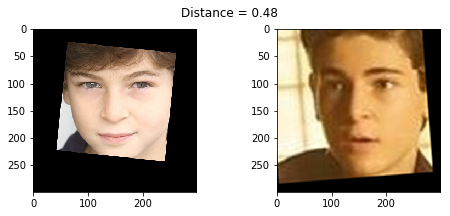

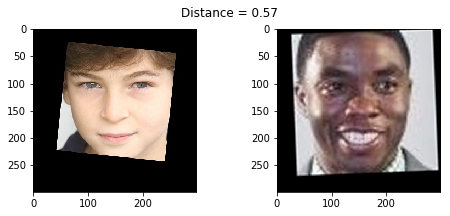

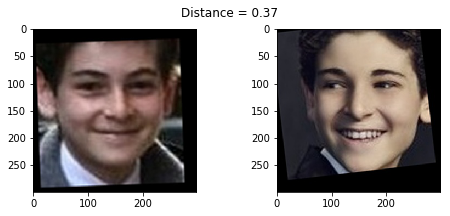

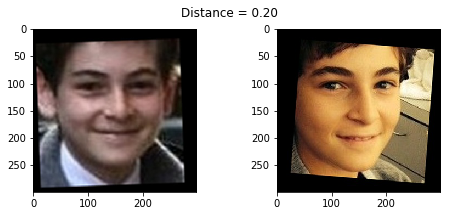

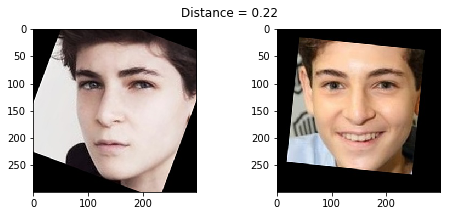

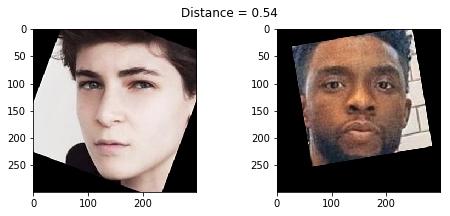

In [14]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

#### It can be seen above that the similar images have less distance while the dissimilar images have greater distance.

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [15]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [16]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

target = np.array([m.name for m in metadata])
enc = LabelEncoder()
enc.fit(target)

y = enc.transform(target)
y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA

pca = PCA() 
  
X_train = pca.fit_transform(X_train_scaled) 
X_test = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[1.35203574e-01 5.36048799e-02 4.00464894e-02 ... 1.69993161e-09
 1.64283459e-09 9.28492695e-11]


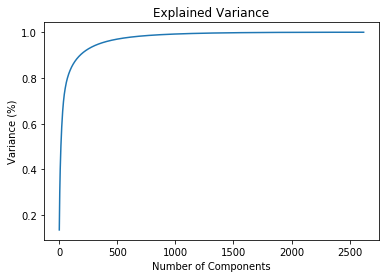

In [20]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

As we can see from the above plot that approximately 1200 components explain close to 98% variance, we can reduce the number of components to 1200 in order to save the computational power without compromising much on the accuracy.

In [21]:
pca = PCA(n_components = 1200) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[1.35203574e-01 5.36048799e-02 4.00464894e-02 ... 1.06709445e-05
 1.06363820e-05 1.05556296e-05]


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [22]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Accuracy Score of SVC Model- ', accuracy_score(y_test, svc_pred))

Accuracy Score of SVC Model-  0.9515455304928989


We are getting an accuracy of 95.15% on the test data.

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [24]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Identified as pins_david mazouz')

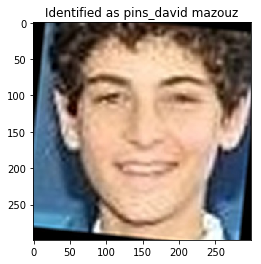

In [26]:
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

#transforming the embedding of the 10th image
example_prediction = svc.predict([X_test[example_idx]])

#inverse transformation of the 10th image
example_identity = enc.inverse_transform(example_prediction)[0]

plt.imshow(example_image)

#the image belongs to which person
plt.title(f'Identified as {example_identity}')

The image belongs to David Mazouz folder.


### Conclusion
Task here was to recognize (aligned) faces from a dataset containing 10k+ images for 100 people using a pre-trained model on Face Recognition.

  * VGG model with pre-trained weights was used to generate embeddings for each images in the dataset.
  * Distance between two pair of images were also calculated and plotted.
  * Since, there were 2,622 features for each image, PCA was used for dimension reduction after standardizing the features.
  * With an cumulative explained variance of 98%, 1200 PCA components were used.
  * Using SVC we predicted the labels for test dataset with an accuracy of more than 95.15%.